# <center>Probability, Bayes' Theorem, and Statistical Data Modeling</center>
# <center>機率, 貝葉斯定理與統計數據建模</center>
#### Keywords: Probability, Bayes' Theorem, Probability Density/Mass Function, Exponential Continuous Random Variables, Poisson Probability, Bernoulli Distribution, Binomial Distribution, Multinomial Distribution, Parametric Statistics Estimation, Method of Moments), Maximum Likelihood Estimation, Non-Parametric Statistics Estimation, Joint Probability Distributions, Naive Bayes Classifier
#### <center><font color='red'>©2019 Todger Lu版權所有，本教材受著作權法之規範保護，僅作為授課教學使用，禁止列印、影印、未經授權不得重製和公開散佈<center></font>

In [1]:
# -*- coding: UTF-8 -*-
%autosave 120
%load_ext version_information
%version_information pandas, numpy, matplotlib, scipy, seaborn, sklearn, statsmodels, torch
# pip install jupyter_contrib_nbextensions
# jupyter contrib nbextension install --user

Autosaving every 120 seconds


Software,Version
Python,3.8.5 64bit [MSC v.1916 64 bit (AMD64)]
IPython,7.20.0
OS,Windows 10 10.0.19041 SP0
pandas,1.2.3
numpy,1.20.1
matplotlib,3.4.1
scipy,1.6.0
seaborn,0.11.1
sklearn,0.24.1
statsmodels,0.12.2


作者為本章撰寫了以下的三個自定義函數，主要是執行肩並肩的列印、釋放記憶體空間以及建立工作區目錄。請讀者自行了解其Python代碼的寫法

In [2]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
import psutil, sys, gc, math
from scipy import stats
import scipy.stats as ss
from IPython.display import display, HTML

# Free Memory
# (1) 獲取物件及其大小的排序列表 
# (2) 將刪除的物件所佔的記憶體釋放
def memoryClean(dirList):
    print('Total Process Memory Usages: %s' %psutil.Process().memory_info().rss)
    print('Memory Usage Statistics: %s' %str(psutil.virtual_memory()))
    reserved_vars = ['In', 'Out', 'exit', 'quit', 'ipython_vars', 'sys', 'os'
                     'gc', 'IODataDir', 'side_by_side', 'memoryClean', 'np',
                     'pd', 'plt','sns', 'mlab', 'display', 'HTML', 'psutil']
    # Display Memory Usage
    # sorted([(x, sys.getsizeof(globals().get(x))) for x in dir()
            # if not x.startswith('_') and
            # x not in sys.modules and
            # x not in ipython_vars],key=lambda x: x[1], reverse=True)
    for name in dirList:
        if not name.startswith('_') and name not in sys.modules and name not in reserved_vars:
            del globals()[name]
    gc.collect()

# 定義函數以便執行肩並肩的列印
def side_by_side(*objs, **kwds):
    from pandas.io.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print (adjoin(space, *reprs))
    print()
    return

# Create a Working Directory
IODataDir = "./Data_and_Images/Statistical_Modeling/"
import os
if not os.path.exists(IODataDir):
    os.makedirs(IODataDir)

def chinese():
    import platform
    if platform.system() == 'Windows':
        # plt.rcParams['font.sans-serif'] = ['SimHei'] # 步驟一（替換sans-serif字型）
        plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
        plt.rcParams['axes.unicode_minus'] = False  # 步驟二（解決座標軸負數的負號顯示問題）
    else:
        # plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
        # mpl.rcParams['font.family'] = ['Heiti TC']
        plt.rcParams['font.family'] = ['Heiti TC']
def english():
    # mpl.style.use('classic')
    plt.rcParams['font.sans-serif'] = ['DejaVu']

%config InlineBackend.figure_format ='retina'
%matplotlib inline

In [3]:
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
# warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore')

## 本章目錄

* [4. 機率與統計學的其他概念](#4.-機率與統計學的其他概念)
    * [4.1 基礎統計與專門術語回顧](#4.1-基礎統計與專門術語回顧)
        * [常態分布中一些值得注意的現象](#常態分布中一些值得注意的現象)
        * [幾何、調和以及算數平均值](#幾何、調和以及算數平均值)
        * [Z-Score](#Z-Score)
        * [中央極限定理(Central Limit Theorem)](#中央極限定理&#40;Central-Limit-Theorem&#41;)
        * [中央極限定理(Central Limit Theorem)與大數法則(Law of Large Number)](#中央極限定理&#40;Central-Limit-Theorem&#41;與大數法則&#40;Law-of-Large-Number&#41;)
        * [中央極限定理(Central Limit Theorem)和蒙特卡羅模擬(Monte Carlo Simulation)](#中央極限定理&#40;Central-Limit-Theorem&#41;和蒙特卡羅模擬&#40;Monte-Carlo-Simulation&#41;)
        * [中央極限定理(Central Limit Theorem)和統計推論(Statistical Inference)](#中央極限定理&#40;Central-Limit-Theorem&#41;和統計推論&#40;Statistical-Inference&#41;)
    * [4.2 統計推論(Statistical Inference)](#4.2-統計推論&#40;Statistical-Inference&#41;)
    * [4.3 海量數據(Big Data)與統計推論(Statistical Inference)](#4.3-海量數據&#40;Big-Data&#41;與統計推論&#40;Statistical-Inference&#41;)
    * [4.4 信賴區間(Confidence Interval;CI)與P-Value的統計意義](#4.4-信賴區間&#40;Confidence-Interval;CI&#41;與P-Value的統計意義)
        * [統計假設檢定(Hypothesis Tests) - Z檢定(z-Test)](#統計假設檢定&#40;Hypothesis-Tests&#41;---Z檢定&#40;z-Test&#41;)
        * [P-Value對我們說明了那些有關統計數據的訊息?](#P-Value對我們說明了那些有關統計數據的訊息?)
    * [4.5 樣本數據組間相關性與獨立性假設檢定的回顧與應用](#4.5-樣本數據組間相關性與獨立性假設檢定的回顧與應用)
        * [t檢定(t-test)應用於A/B Testing行銷應用範例](#t檢定&#40;t-test&#41;應用於A/B-Testing行銷應用範例)
        * [兩個變數的方差分析(ANOVA; F檢定)](#兩個變數的方差分析&#40;ANOVA;-F檢定&#41;)
        * [皮爾森的卡方檢定(Pearson’s Chi-Squared Test)](#皮爾森的卡方檢定&#40;Pearson’s-Chi-Squared-Test&#41;)
    * [4.6 範例 - 自行車共享數據集的統計假設檢定](#4.6-範例---自行車共享數據集的統計假設檢定)

[回本章目錄](#本章目錄)

## 4. 機率與統計學的其他概念

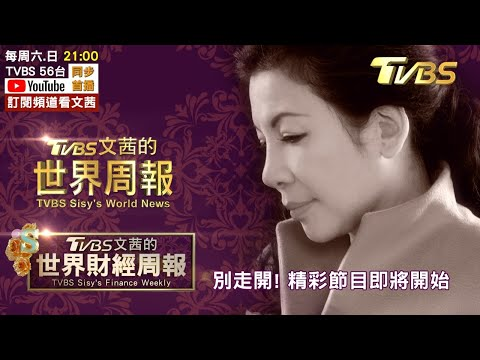

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('BHJGq6Uuk_U')

### 4.1 基礎統計與專門術語回顧

<div class="fig figcenter fighighlight">
  <img src="./Data_and_Images/Statistical_Modeling/2020 Elementary Statistics - 1.jpg" width="400" style = "display: inline; float: left; margin-top: 24px; margin-left: 40px"/>
  <img src="./Data_and_Images/Statistical_Modeling/2020 Elementary Statistics - 2.jpg" width="400" style = "display: inline; float: left; margin-top: 24px; margin-left: 30px"/>

### Distribution Shapes - Violin Plots, Box Plots and Stem-and-leaf Plots
**pip install stemgraphic**

In [5]:
from stemgraphic.num import stem_graphic
# a few distributions, 500 values from each
normal_pop = np.random.normal(loc=500, scale=100, size=500).round(2)  # mean, std dev, number in population
uniform_pop = np.random.uniform(low=0, high=1000, size=500).round(2)   # min, max, number in population
exponential_pop = np.random.exponential(scale=100.0, size=500).round(2)   # scale, number in population
gamma_pop = np.random.gamma(shape=0.5, scale=2, size=500).round(2) #shape(alpha), scale(beta)

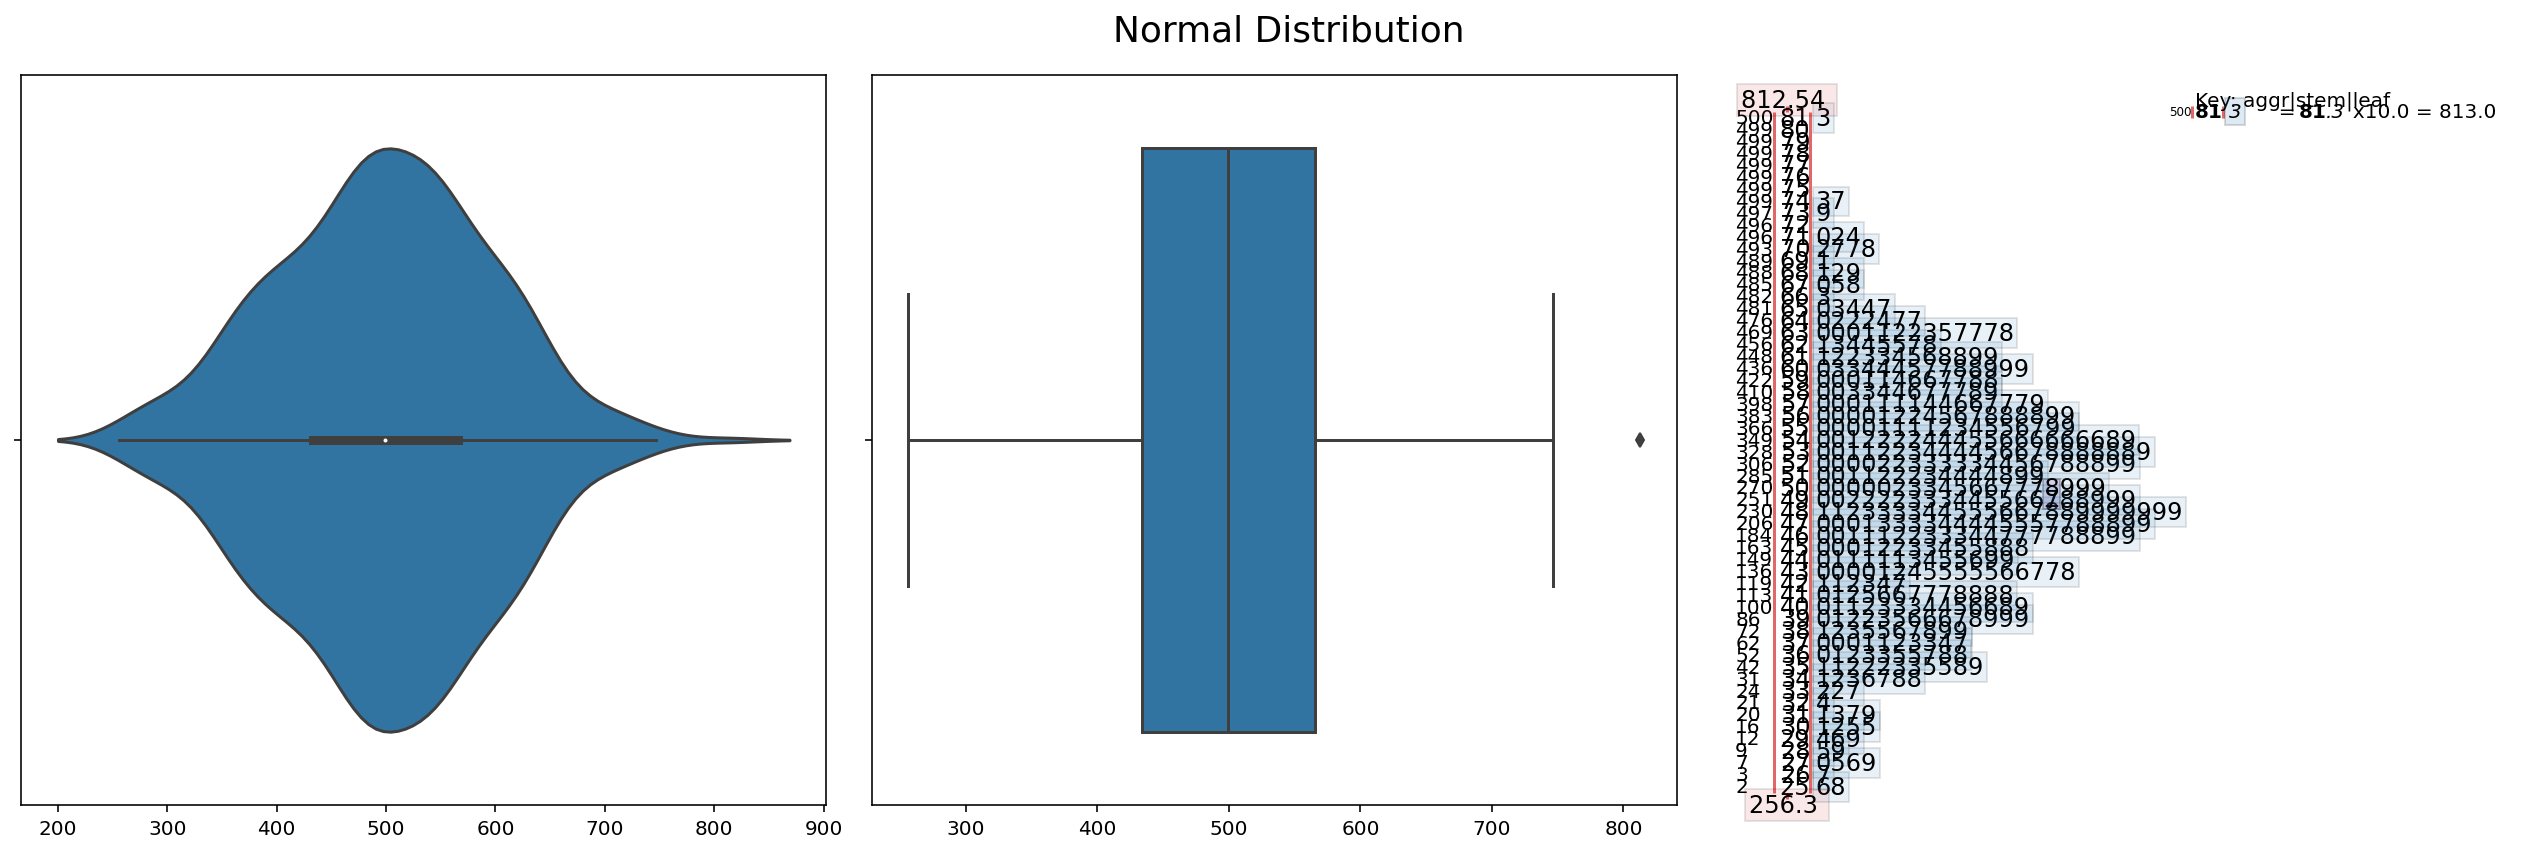

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18, 6))
plt.suptitle("Normal Distribution", fontsize=18)
sns.violinplot(normal_pop, orient='v', ax=ax1)
sns.boxplot(normal_pop, orient='v', ax=ax2)
stem_graphic(normal_pop, ax=ax3);

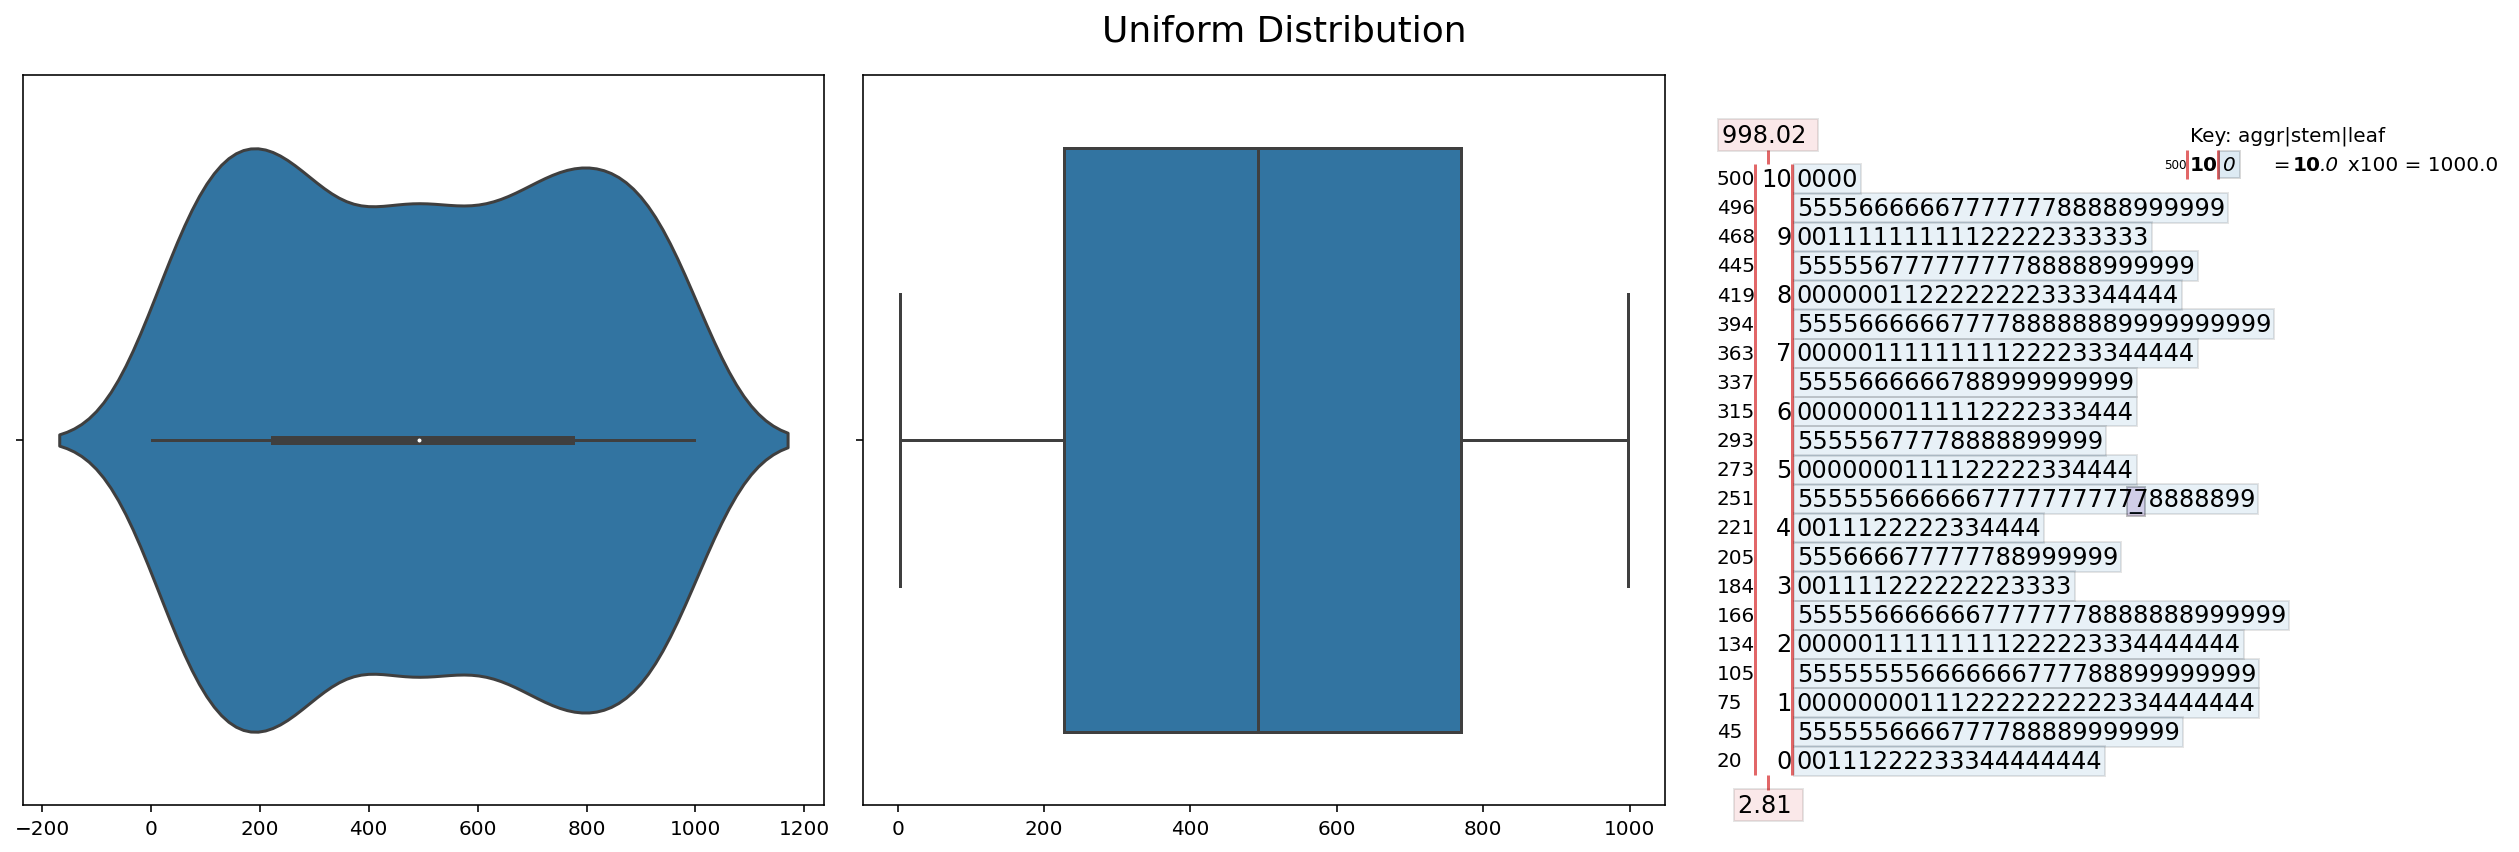

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18, 6))
plt.suptitle("Uniform Distribution", fontsize=18)
sns.violinplot(uniform_pop, orient='v', ax=ax1)
sns.boxplot(uniform_pop, orient='v', ax=ax2)
stem_graphic(uniform_pop, ax=ax3);

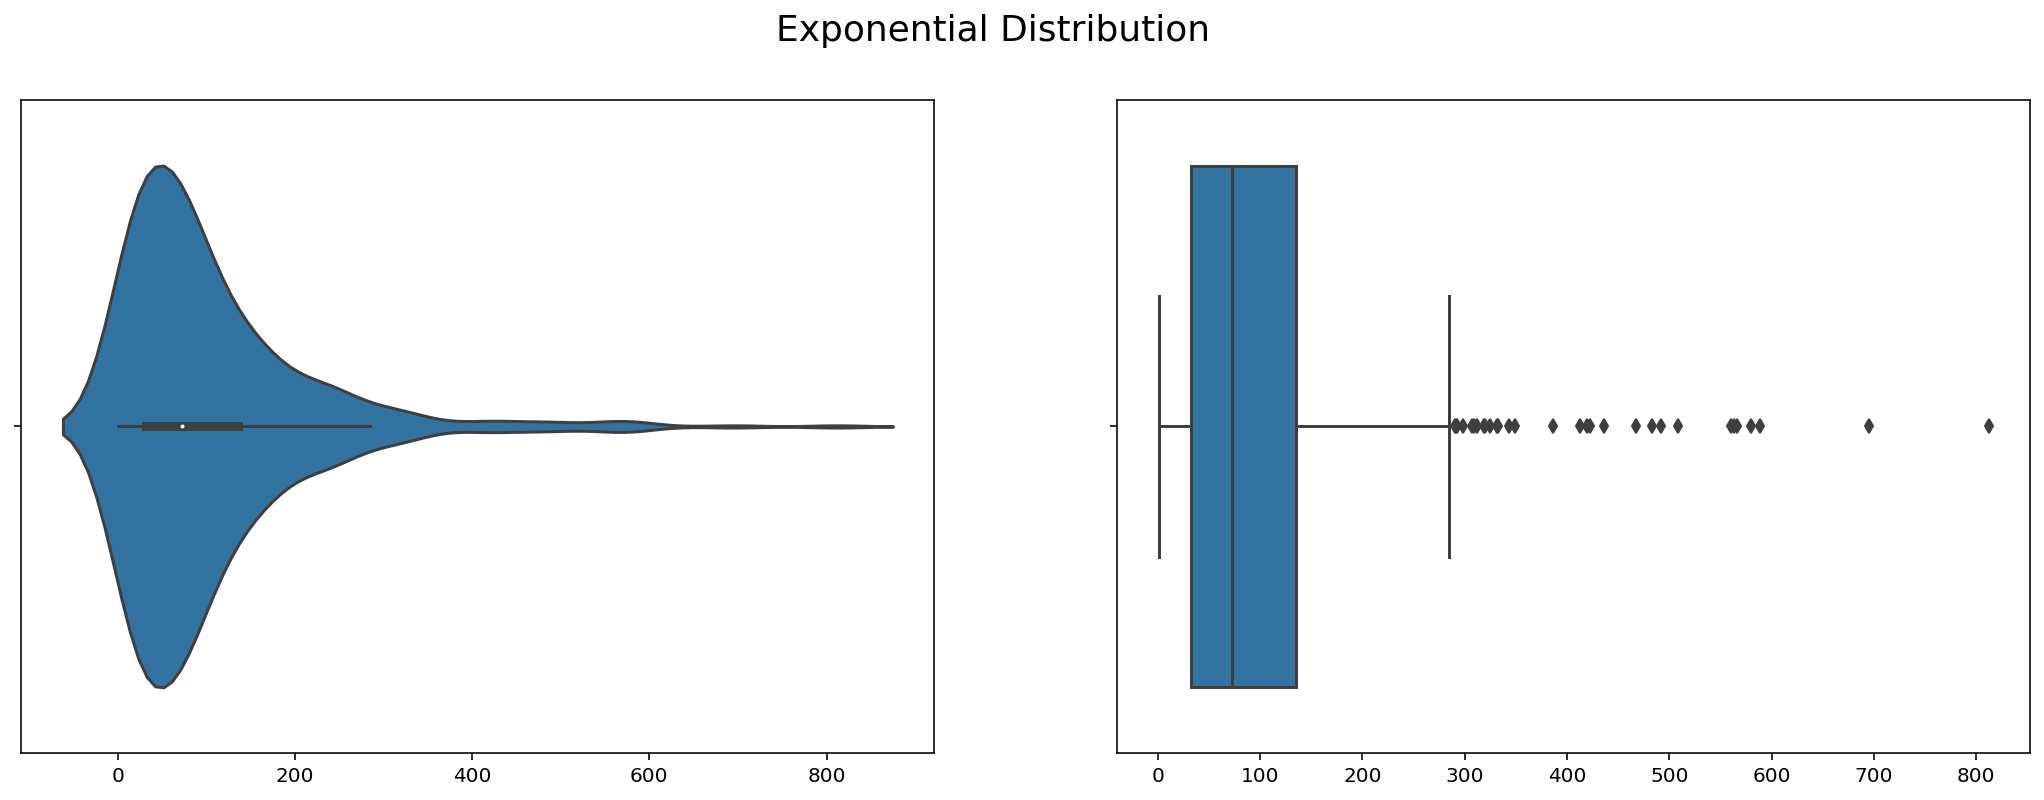

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 6))
plt.suptitle("Exponential Distribution", fontsize=18)
sns.violinplot(exponential_pop, orient='v', ax=ax1)
sns.boxplot(exponential_pop, orient='v', ax=ax2)
plt.show()

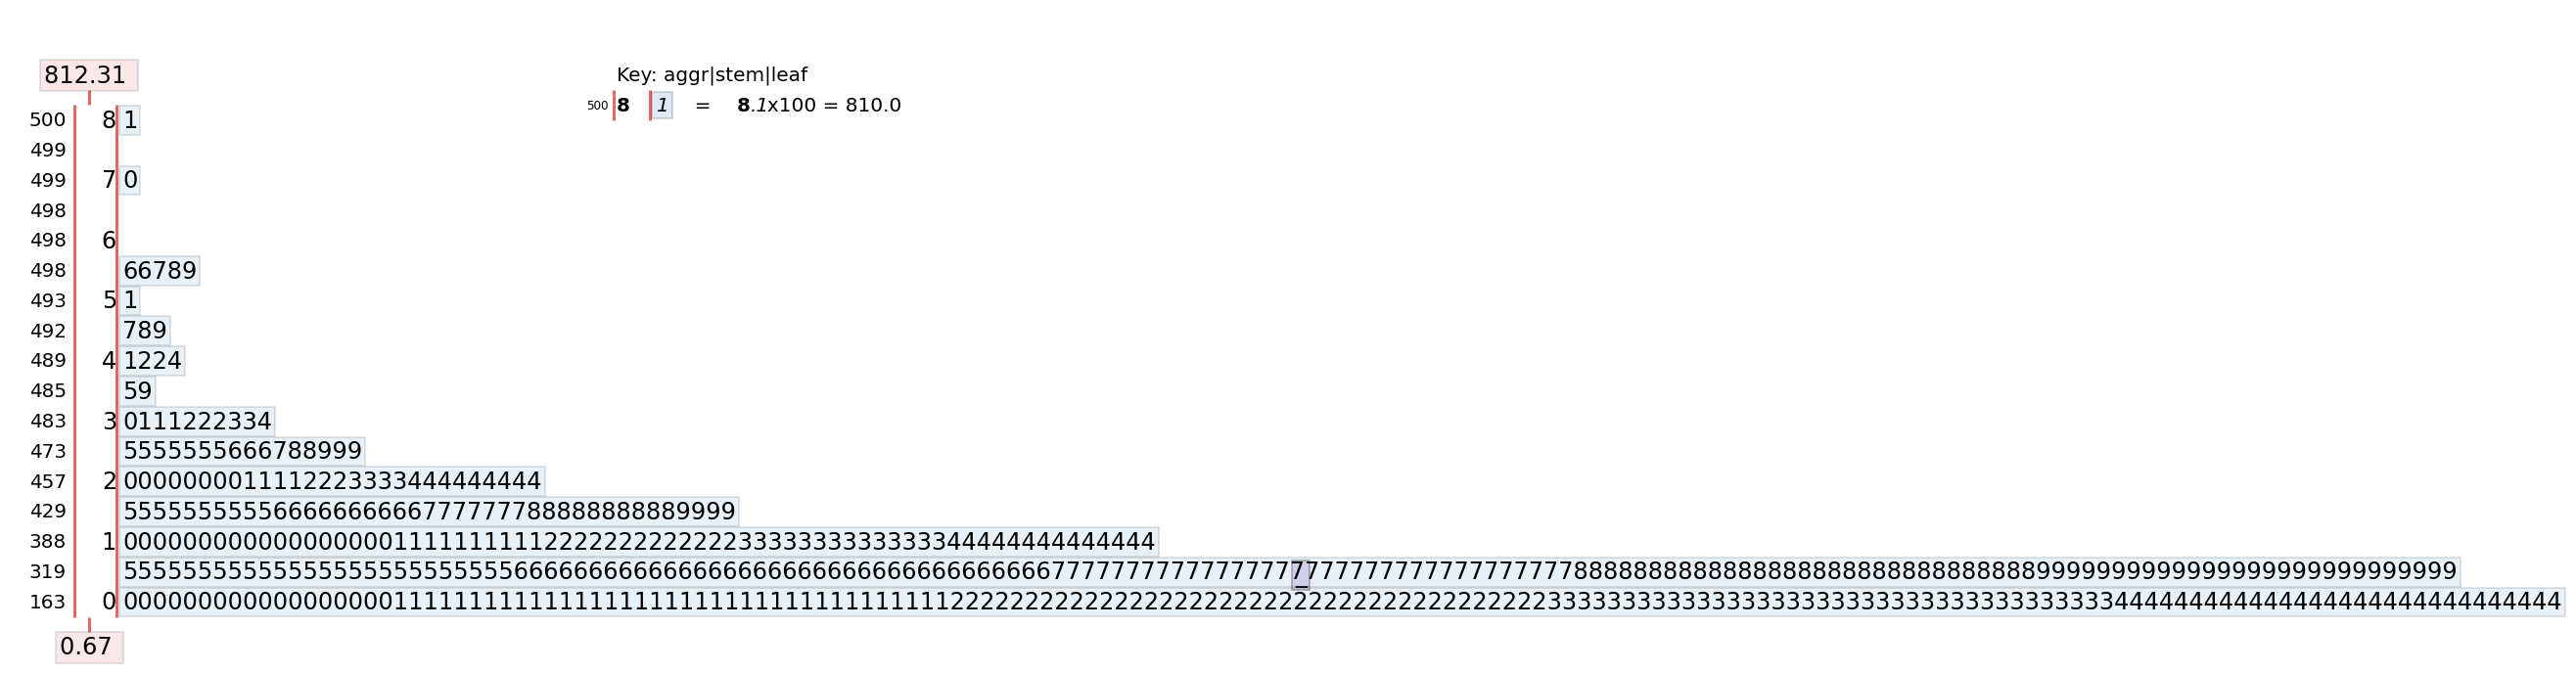

In [9]:
stem_graphic(exponential_pop);

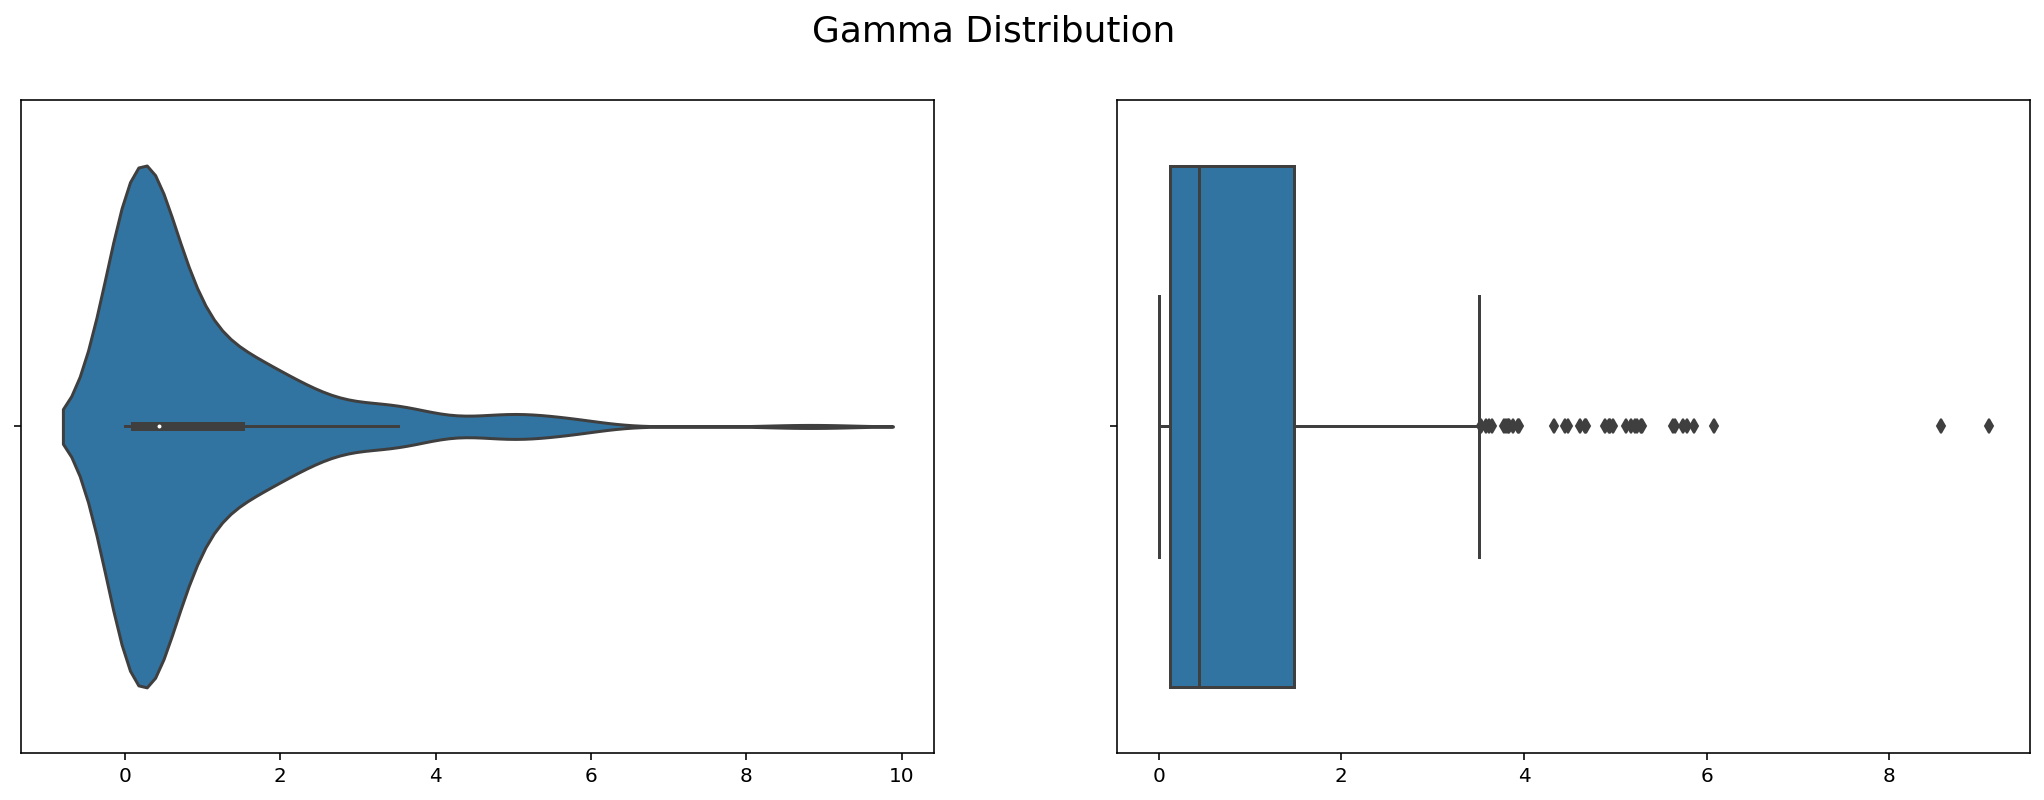

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 6))
plt.suptitle("Gamma Distribution", fontsize=18)
sns.violinplot(gamma_pop, orient='v', ax=ax1)
sns.boxplot(gamma_pop, orient='v', ax=ax2)
plt.show()

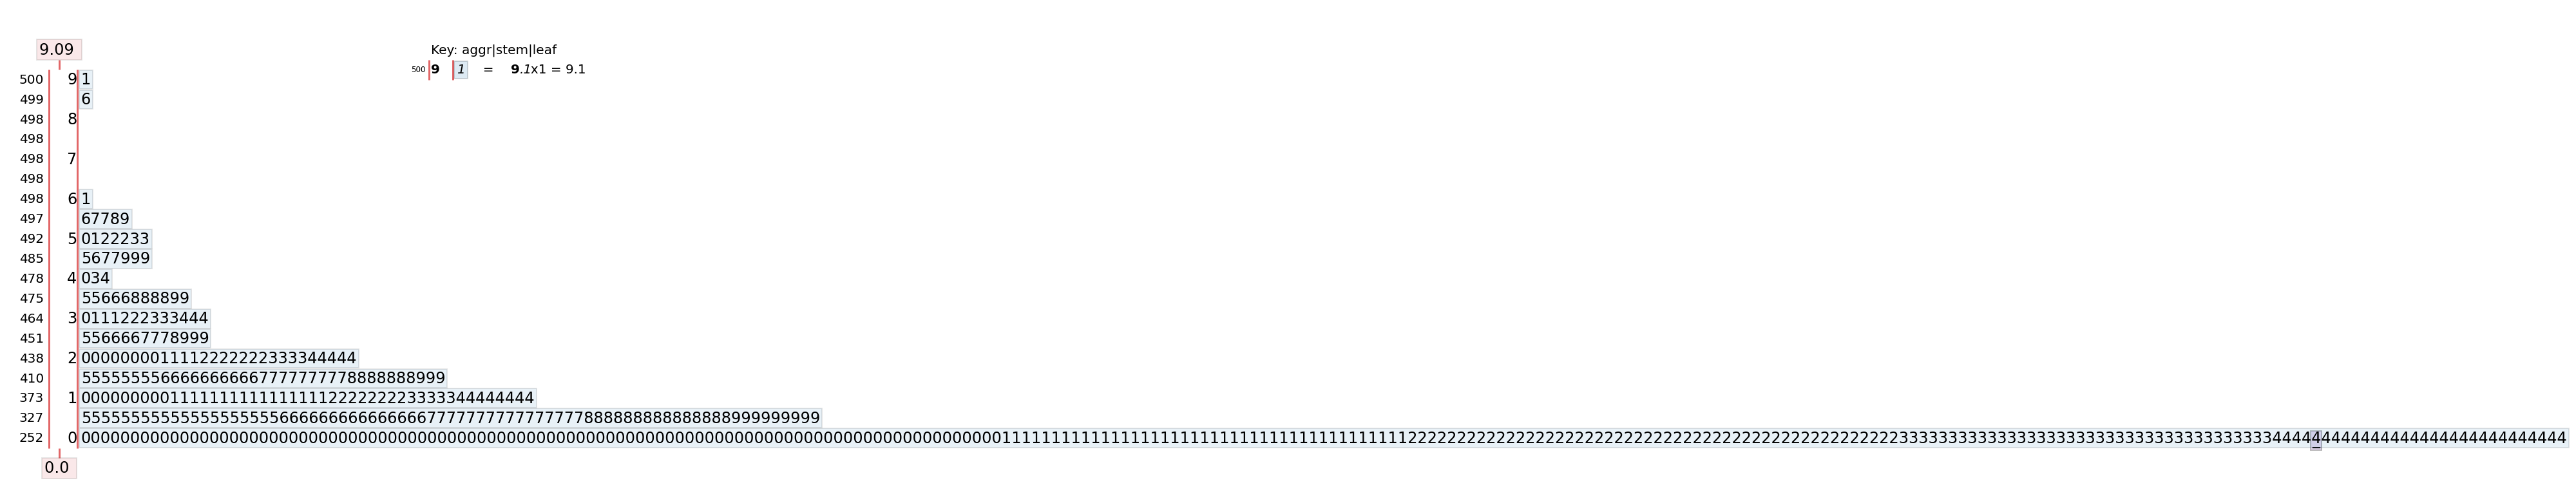

In [11]:
stem_graphic(gamma_pop);

<div class="fig figcenter fighighlight">
  <img src="./Data_and_Images/Statistical_Modeling/2020 Elementary Statistics - 3.jpg" width="400" style = "display: inline; float: left; margin-top: 24px; margin-left: 40px"/>
  <img src="./Data_and_Images/Statistical_Modeling/2020 Elementary Statistics - 4.jpg" width="400" style = "display: inline; float: left; margin-top: 24px; margin-left: 30px"/>

<div class="fig figcenter fighighlight">
  <img src="./Data_and_Images/Statistical_Modeling/2020 Elementary Statistics - 5.jpg" width="400" style = "display: inline; float: left; margin-top: 24px; margin-left: 40px"/>
  <img src="./Data_and_Images/Statistical_Modeling/2020 Elementary Statistics - 6.jpg" width="400" style = "display: inline; float: left; margin-top: 24px; margin-left: 30px"/>

<div class="fig figcenter fighighlight">
  <img src="./Data_and_Images/Statistical_Modeling/Brief_Statistics_Review.png" width="400" style = "display: inline; float: left; margin-top: 24px; margin-left: 40px"/>
  <img src="./Data_and_Images/Statistical_Modeling/Central_Tendency_Dispersion.png" width="400" style = "display: inline; float: left; margin-top: 24px; margin-left: 30px"/>

### 常態分布中一些值得注意的現象：
- 常態分布的密度函數是以平均值為對稱的。
- 平均值與它的眾數(statistical mode)以及中位數(median)是同一數值。
- 密度函數曲線之下:
    - 68.268949%的面積在平均數左右的一個標準差1σ範圍內。
    - 95.449974%的面積在平均數左右兩個標準差2σ的範圍內。
    - 99.730020%的面積在平均數左右三個標準差3σ的範圍內。
    - 99.993666%的面積在平均數左右四個標準差4σ的範圍內。
- 大數法則是說，樣本數量越多，則其平均就越趨近期望值。

### 幾何、調和以及算數平均值
- 從數學上而言，沒有一個數學運算能正確地稱為“平均值”。我們通常說的“平均值”指的是算術平均(Arithmetic Mean)。 之所以稱算術平均為平均值，是因為我們希望它符合“平均值”的口語定義。如果我們對計算家庭收入的中位數與算術平均為例，就不難理解當我們將自己與中位數進行比較，在統計上的相關性上是高於與平均值進行比較的。
- 在一串的數字中，若數子之間與具有加法的關係，我們使用“算術平均”。若數子之間與具有乘法的關係，我們使用“幾何平均(Geometric Mean)”。最直覺的例子是與時間上有關的平均，例如計算利率的平均、營收的平均複合成長率或平均報酬率。可以[參考](https://medium.com/@JLMC/understanding-three-simple-statistics-for-data-visualizations-2619dbb3677a)。
- 調和平均(Harmonic Mean)的計算為變數倒數的算術平均數的倒數。通常用於數子之間具有倒數的關係。例如等距離平均速度、等價錢平均價格等。也就是說在處理不同長度或期間的比率的數據集時，我們使用調和平均。

### Z-Score
- Z-Score的量度代表數據發生在離均值多少個標準差。舉例來說以常態分配而言, 約有99.7%的機率, 數據是落在離平均值正負$3\sigma$之間。
<div class="fig figcenter fighighlight">
  <img src="./Data_and_Images/Statistical_Modeling/Normal_Distribution.png" width="400" style = "display: inline; float: left; margin-top: 24px; margin-left: 40px"/>
  <img src="./Data_and_Images/Statistical_Modeling/Checklist.png" width="400" style = "display: inline; float: left; margin-top: 24px; margin-left: 30px"/>

以美國大學考試的ACT成績為例。假設總體的平均得分為21，標準差為5。我們如何確定分數高於30的概率？
- 首先是使用Z-Score公式計算出Z-Score。它是30與21之間的差值，即9，除以5的標準差，得出的z值為1.8。 如果查看Z-Score表，則概率值為0.9641。
- 這告訴我們ACT在30左側的面積為0.9641，或是說機率密度曲線下大約96％的面積落在Z-Score為1.8的左側。分數大於30的概率，便是1-0.9641=0.0359。

In [12]:
from scipy import stats
stats.norm.cdf((30-21)/5).round(4)

0.9641

### 中央極限定理(Central Limit Theorem)
- 中央極限定理涉及樣本平均值的分佈。中央極限定理(CLT)基本上說的是對於任意概率分配數據，只要原始樣本量足夠大，無論母體的分佈是什麼，不斷地採樣後的樣本平均值其分佈都具有近似常態分配(Normal Distribution)。
- 對母體的非常態分配而言，在中央極限定理下，允許我們使用近似常態分配來簡化統計中的問題。更由於統計人員對常態分配了解甚多，使得統計分析變的容易得多。
- 中央極限定理非常重要，因為無論母體分佈的形狀如何，中央極限定理都將保持不變，這對於統計推論非常重要。收集的樣本採樣次數越多，統計推斷就越準確，這意味著估計的確定性越高。

### 根據均勻分佈生成一個重量介於60公斤與90公斤間的樣本(大小= 50)

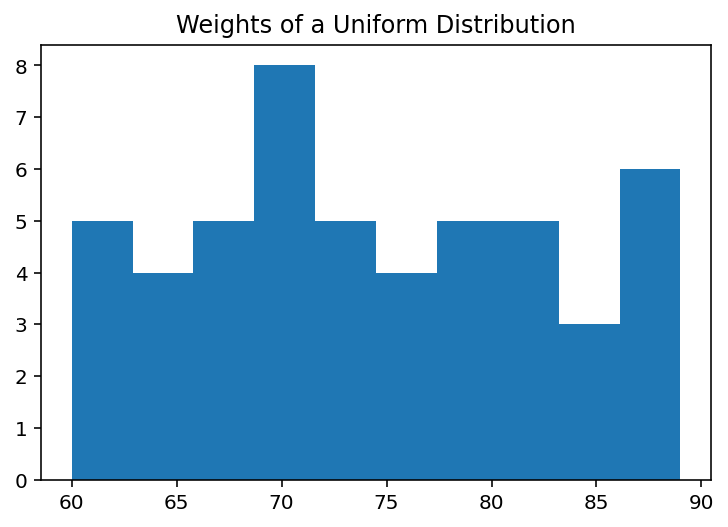

The average weight is 74.32 kg


In [13]:
np.random.seed(1)
# generate a sample (size =50) of men's weights from a unifrom distribution
weights = np.random.randint(60, 90, 50)
plt.hist(weights)
plt.title('Weights of a Uniform Distribution')
plt.show()
print('The average weight is {} kg'.format(np.mean(weights)))

### 1000次的重量模擬

In [14]:
from matplotlib import animation, rc
from IPython.display import HTML
# 1000 simulations of weights
n_simulations = 1000
np.random.seed(1)
avg = []
for i in range(n_simulations):
    a = np.random.randint(60, 90, 50)
    avg.append(np.average(a))

# Function that will plot the histogram, where current is the latest figure
def clt(current):
    # if animation is at the last frame, stop it
    plt.cla()
    if current == 1000: 
        a.event_source.stop()

    plt.hist(avg[0:current])

    plt.gca().set_title('Expected value of weights')
    plt.gca().set_xlabel('Average from weights')
    plt.gca().set_ylabel('Frequency')

For animation(動畫) plot, please download [ffmpeg](https://www.wikihow.com/Install-FFmpeg-on-Windows) or [imagemagick](https://sourceforge.net/projects/imagemagick/files/). Do not forget to add FFmpeg to Windows path.
Or, **pip install ffmpeg-python**

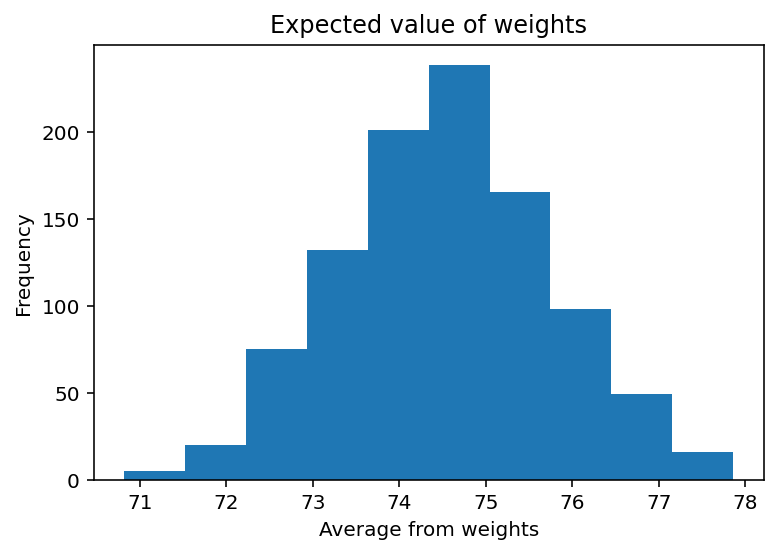

In [15]:
fig = plt.figure();
# anim = animation.FuncAnimation(fig, clt, interval=1)
# anim = animation.FuncAnimation(fig, clt, frames=200, interval=5)
anim = animation.FuncAnimation(fig, clt, frames=1000, interval=1)
HTML(anim.to_html5_video())
# rc('animation', html='html5')
# anim

In [16]:
# anim.save('cls.gif', writer='imagemagick')
HTML("""
<video width="1024" height="600" controls>
  <source src="./Data_and_Images/Statistical_Modeling/clt.mp4" type="video/mp4">
</video>
""")

[回本章目錄](#本章目錄)

### 中央極限定理(Central Limit Theorem)與大數法則(Law of Large Number)
- 中央極限定理(Central Limit Theorem)指出，當樣本採樣次數趨於無窮大時(repeated sampling)，**每次採樣的樣本的平均值**將呈常態分佈。
- 此抽樣分佈的平均值將是母體平均值，並且方差等於母體方差除以n(亦即$\sigma^2/n)$。如果取此方差的平方根，則得出採樣分佈的標準差$\sigma/\sqrt{n}$，我們稱其為標準誤差(standard error)。這信息告訴我們，採樣的樣本平均值將趨近母體平均值，並且採樣量變大時，採樣的樣本方差會變小，則樣本平均值將更趨近母體平均值。
- 大數法則(Law of Large Number)指出，當獨立且均等分佈(iid)隨機變量的樣本採樣量趨於無窮大時，樣本均值等於母體均值(例如銅幣的兩面)。但是，不沒有告訴我們有關該隨機變量分布的任何信息。如果大數法則告訴我們，允許隨機變量的樣本(在採樣量夠大下)來評估母體期望值時，中央極限定理則提供攸關該隨機變量分佈的信息。

### 在a = 0，b = 100的情況下進行1000次均勻分佈模擬的非動畫圖，均勻分布的概率密度函數期望值與標準差分別為$E(X)=\frac{a+b}{2}, \quad Var(X)=\frac{(b-a)^2}{12}$，採樣分佈的標準差$\sigma/\sqrt{n}$

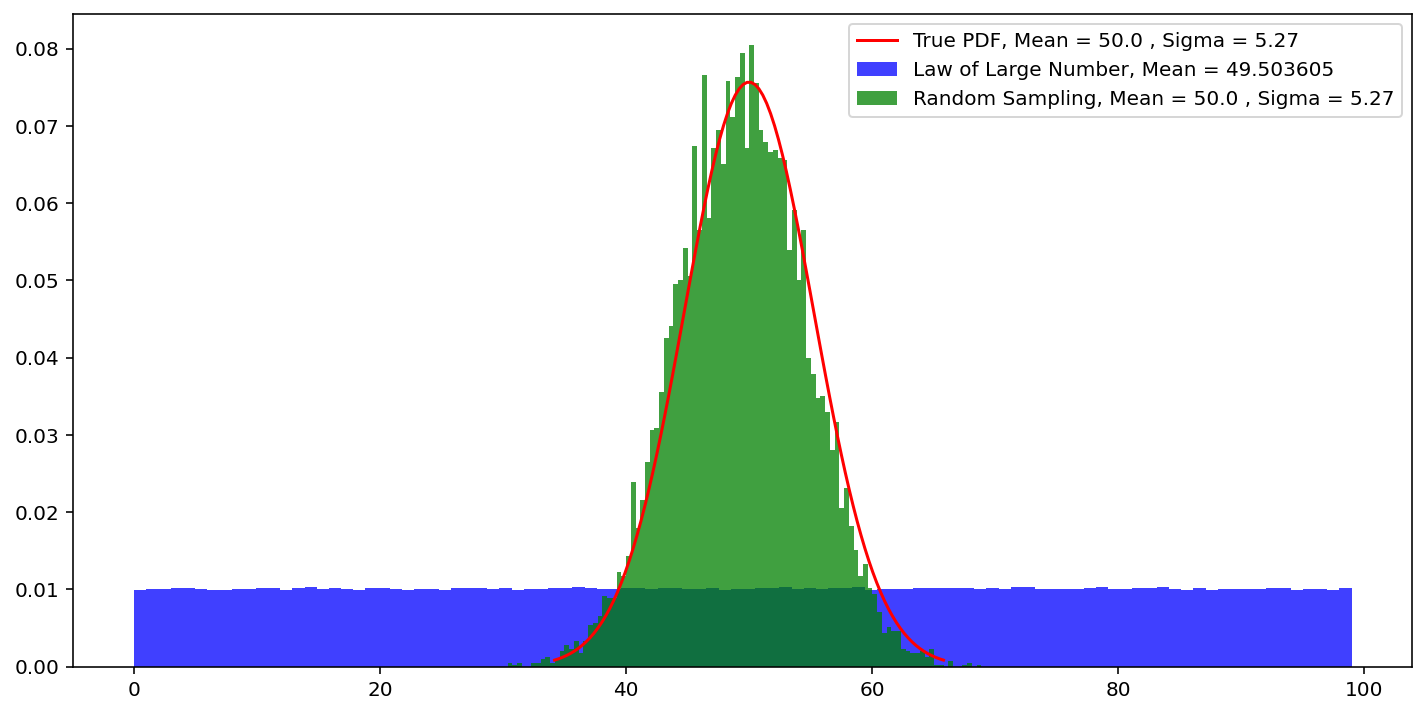

In [17]:
# Non-animation Plot
# 1000 simulations of uniform distribution with a=0, b=100
fig = plt.figure(figsize=(12,6))
n_simulations = 10000
sample_size=30
np.random.seed(100)
avg = []
# Law of Large Number
largeN = np.random.randint(0, 100, int(1e6))
# CLT
for i in range(n_simulations):
    sample_list=[]
    for j in range(sample_size):
        sample_list.append(np.random.randint(0, 100))
    avg.append(np.average(sample_list))

mu = (0+100)/2
variance = ((100-0)**2/12)
sigma = np.sqrt(variance)/(np.sqrt(sample_size)) # sample sd / sqrt(sampple size)
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
plt.hist(largeN, bins=100, density=True, facecolor='b', alpha=0.75, 
         label="Law of Large Number, Mean = "+repr(np.average(largeN)))
plt.hist(avg, bins=100, density=True, facecolor='g', alpha=0.75, 
         label="Random Sampling, Mean = "+repr(mu)+" , Sigma = "+repr(np.round(sigma,2)))
# True PDF
plt.plot(x, ss.norm.pdf(x, mu, sigma), 'r',
         label="True PDF, Mean = "+repr(mu)+" , Sigma = "+repr(np.round(sigma,2)))
plt.legend()
# plt.tight_layout()
plt.show()

[回本章目錄](#本章目錄)

### 中央極限定理(Central Limit Theorem)和蒙特卡羅模擬(Monte Carlo Simulation)
- 中央極限定理與大數法則皆可以利用蒙特卡羅方法來模擬。蒙特卡洛方法基本上是種計算演算法，它依賴於重複隨機採樣來獲得某些數值結果，並且可以將這些數值用於解釋概率的問題。換言之，蒙特卡洛模擬從某些概率分布中進行重複多次的隨機採樣，最終輸出的結果可以用來描述機率分佈。例如，我們不斷地從已知分佈(標準常態分佈)中採樣，然後將模擬結果與理論進行比較。 我們以下列估算$\pi$的例子中，來見證當重複隨機採樣次數極大化的時，$\pi$被估算的狀況。

- 示例：使用蒙特卡羅模擬方法估算$\pi$值
這個想法是模擬一個二維平面中的隨機$(x, y)$點，其域(domain)為邊$w$的平方。我們將一個圓放在具有相同直徑$w$的同一個域內，則有：
- 正方形面積$S$為： $w^2$
- 圓$C$面積為： $\pi (\frac{w}{2})^2$
- 將圓的面積除以正方形的面積： $\frac{S}{C}= \frac{\pi}{4}$, 我們現在有了$4*\frac{S}{C}= \pi$.
為了估算$\pi$的值，我們計算了位於圓內的點數與生成點總數的比率。也就是
$$\pi=4*\frac{\text{在圓內產生的點數}}{\text{在正方形內產生的點數}}$$
我們希望使用蒙特卡羅模擬方法估算$\pi$值是最佳的精確值。

`[INSTALL PYTORCH](https://pytorch.org/)`

`conda install pytorch torchvision torchaudio cudatoolkit=10.2 -c pytorch`

In [18]:
import torch
def estimate_pi_mc(nIterations):
    # Initialize the number of points falling within the unit circle, and a list storing those points:
    n_point_circle = 0
    pi_iteration = []
    nPoints_circle = []
    nPoint_square = []
    # Accumulate the number of random points within the circle if the distance is less than 1:
    for anIteration in range(1, nIterations+1):
        # We randomly generate a random 2D point within the square, with the range of -1<x<1 and -1<y<1:
        point = torch.rand(2) * 2 - 1
        nPoint_square.append(point)
        r = torch.sqrt(point[0] ** 2 + point[1] ** 2) # distance to the center (0, 0)
        if r <= 1:
            n_point_circle += 1
            nPoints_circle.append(point)
        # calulate pi for each iteration
        pi_iteration.append(4 * (n_point_circle / anIteration))
    return pi_iteration, nPoint_square, nPoints_circle

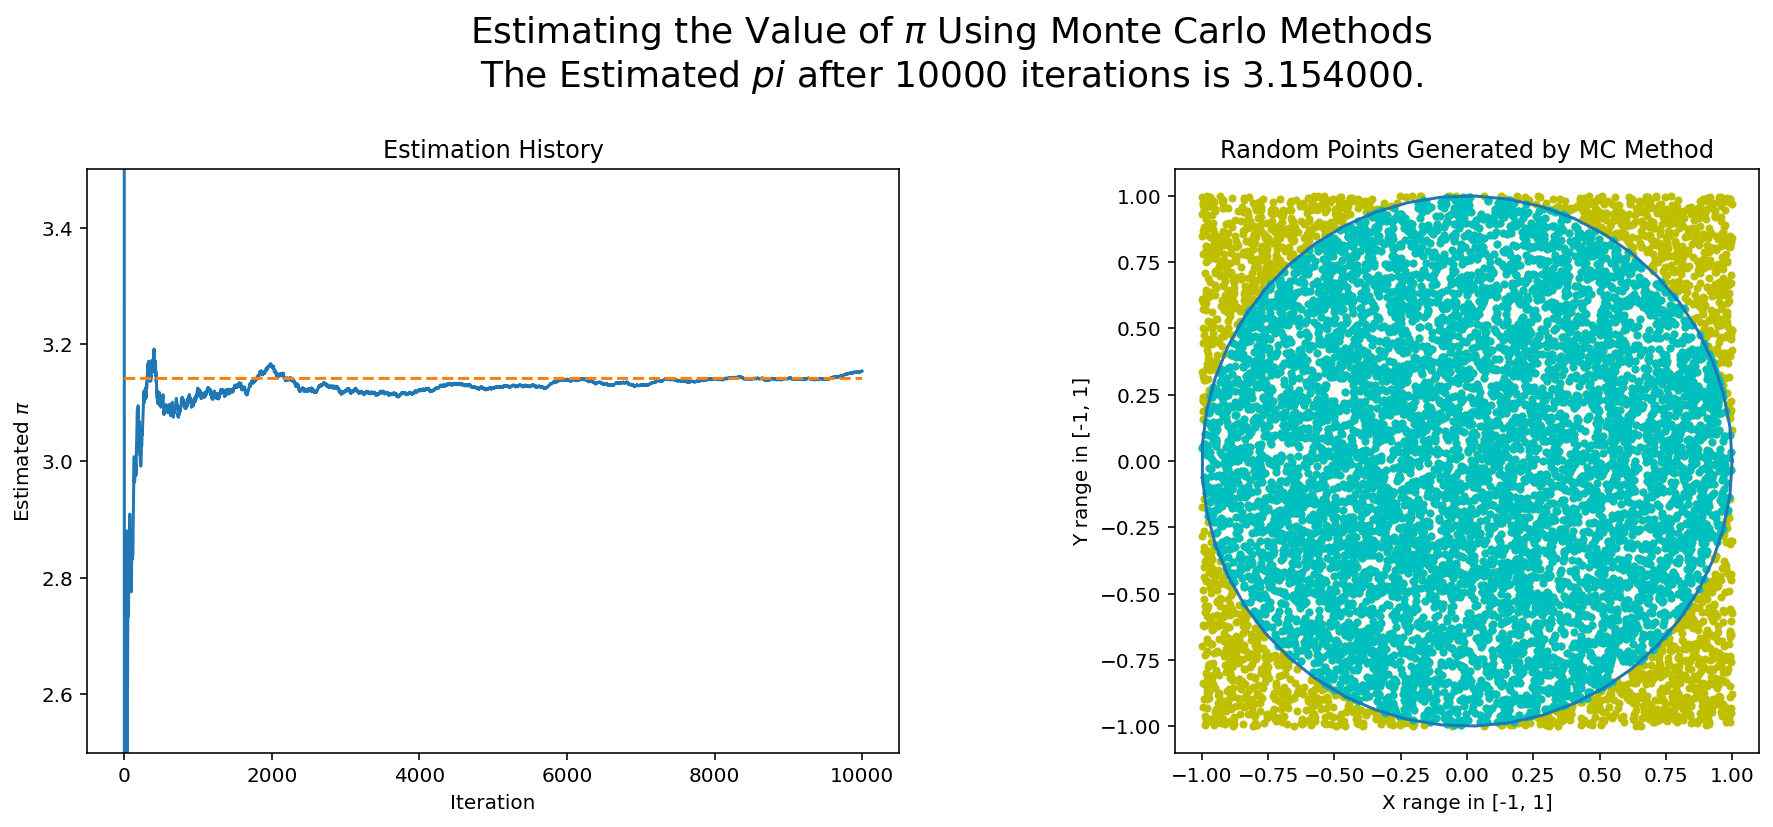

In [19]:
%matplotlib inline
n_iterations = 10000
pi_iteration, nPoint_square, nPoints_circle = estimate_pi_mc(n_iterations)
fig, ax = plt.subplots(1,2,figsize=(16,6))
plt.suptitle("Estimating the Value of $\pi$ Using Monte Carlo Methods\n"+\
             "The Estimated $pi$ after {:d} iterations is {:f}.".format(n_iterations, pi_iteration[-1]), 
             fontsize=18)
fig.subplots_adjust(top=0.8)
# Plot the estimation History
ax[0].plot(pi_iteration)
ax[0].plot([math.pi] * n_iterations, '--')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Estimated $\pi$')
ax[0].set_ylim([2.5, 3.5])
ax[0].set_title('Estimation History')
# Count the number of points in the square and circle and keep track of those points:
nPoint_square = torch.stack(nPoint_square)
nPoints_circle = torch.stack(nPoints_circle)
# Plot all random points and use a different color for those in the circle:
ax[1].plot(nPoint_square[:, 0].numpy(), nPoint_square[:, 1].numpy(), 'y.')
ax[1].plot(nPoints_circle[:, 0].numpy(), nPoints_circle[:,1].numpy(), 'c.')
# Draw the circle for better visualization:
i = torch.from_numpy(np.linspace(0, 2 * math.pi))
ax[1].plot(torch.cos(i).numpy(), torch.sin(i).numpy())
ax[1].set_xlabel('X range in [-1, 1]')
ax[1].set_ylabel('Y range in [-1, 1]')
ax[1].set_title('Random Points Generated by MC Method')
ax[1].set_aspect('equal')
plt.show()

[回本章目錄](#本章目錄)

### 中央極限定理(Central Limit Theorem)和統計推論(Statistical Inference)
- 在CLT下，我們確切知道母體的平均值分佈是什麼樣，所以我們可以從單個樣本中獲取平均值，並將其與採樣分佈進行比較，以評估我們的樣本來自同一母體的可能性。 換句話說，我們可以檢定：我們的樣本代表的母體是否來自一已知的母體。
- 舉個例子來說: 智商在母體的分佈平均值為100，標準差為15。我們對36名接受了新穎教育形式的學生進行抽樣調查，並希望確定這些人是否在系統上比其他人群更聰明。為此，我們計算樣本的平均值，我們觀察到的樣本平均智商為105。如果我們在重複採樣下，105這一個值會再出現？出現的次數多還是稀少？給定中央極限定理，我們知道平均值的分佈將是常態分佈的，平均值為100，標準差為$15/\sqrt{36}=2.5$。 我們可以將樣本的平均值與此分佈進行比較，這就是所謂統計推論。
- 統計推論使用樣本數據對母體做出合理的判斷。它用於檢查樣本中的統計量與母體的參數間的關係。
- 統計推論有用之處在於，因為要研究整個母體是困難的(在某些情況下是不可能的)而且昂貴且耗時的。但是，通過利用統計上有效樣本和推論統計，數據科學家可以進行較能驗證結果的研究。

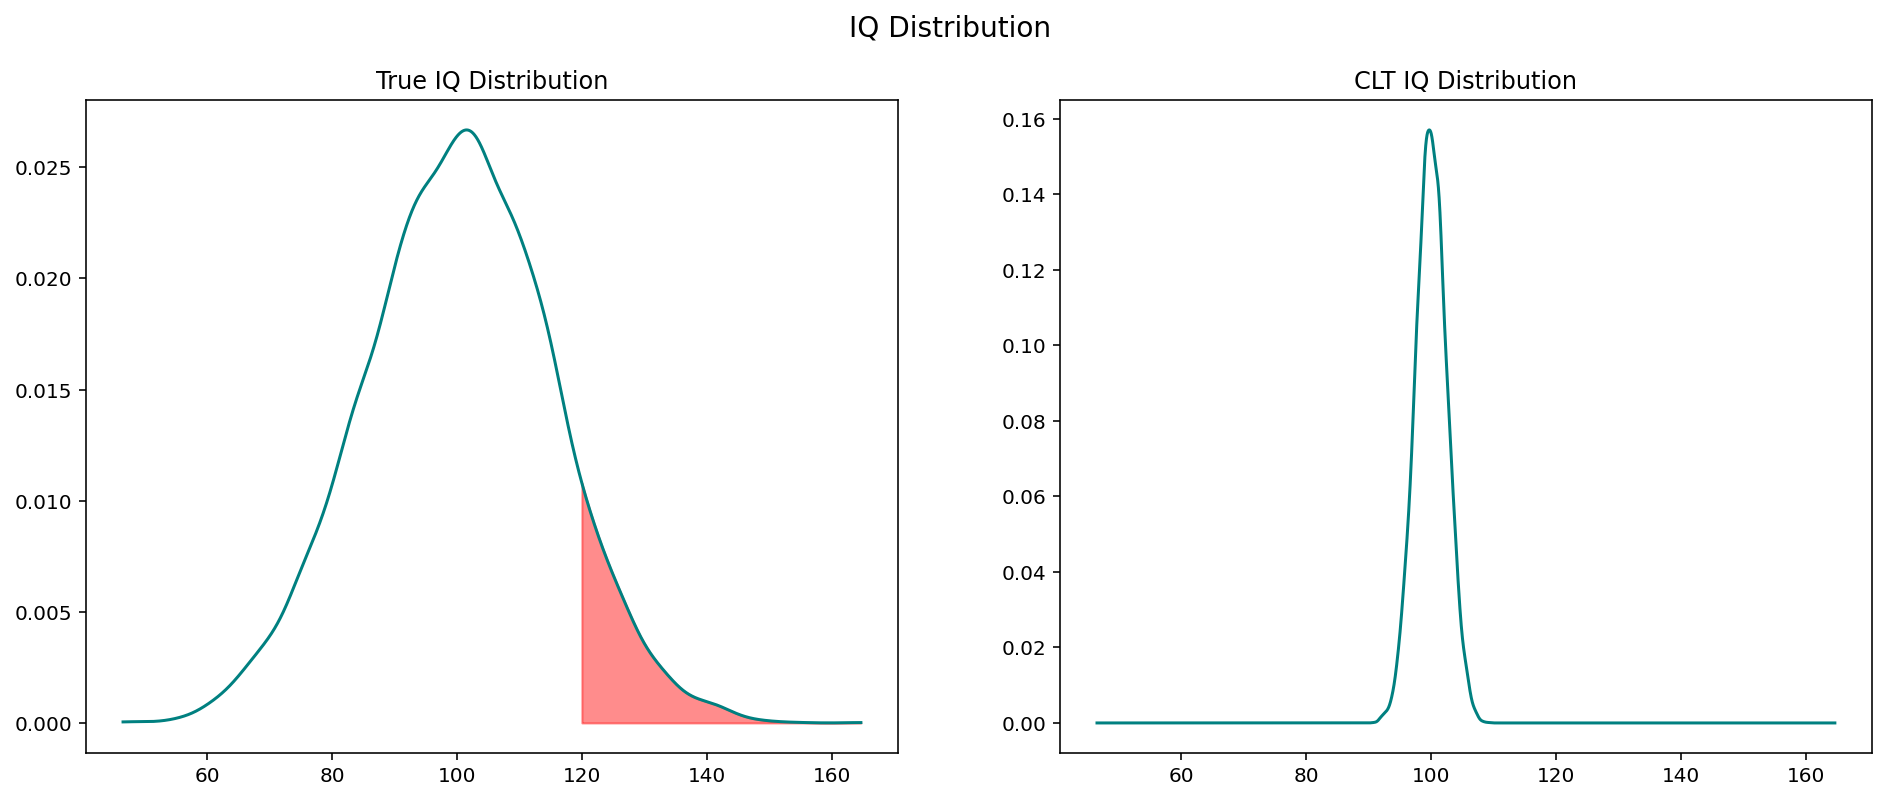

In [20]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
plt.suptitle("IQ Distribution", fontsize=14)
samples = np.random.normal(loc=100, scale=15, size=10000) # True Population Mean = 100 and  std =15
kde = stats.gaussian_kde(samples)
pos = np.linspace(np.min(samples), np.max(samples), 24000)
ax[0].plot(pos, kde(pos), color='teal')
shade = np.linspace(120, np.max(samples), 300) # IQ >= 120
ax[0].fill_between(shade, kde(shade), alpha=0.45, color='red')
ax[0].set_title("True IQ Distribution", fontsize=12)
samplesCLT = np.random.normal(loc=100, scale=2.5, size=10000) # True Population Mean = 100 and  std =15
kde = stats.gaussian_kde(samplesCLT)
pos = np.linspace(np.min(samples), np.max(samples), 24000)
ax[1].plot(pos, kde(pos), color='teal')
shade = np.linspace(120, np.max(samples), 300) # IQ >= 120
ax[1].fill_between(shade, kde(shade), alpha=0.45, color='red')
ax[1].set_title("CLT IQ Distribution", fontsize=12)
plt.show()

[回本章目錄](#本章目錄)

### 4.2 統計推論(Statistical Inference)
- 學過統計學的人，可能會對統計推論感到很無味。其實，統計推論是一項具深度和美感的學科。統計推論主要是研究如何在隨機抽樣的基礎上推論出有關母體的參數值或特徵變量間的關係。一般包括：統計推論、實驗設計、估計理論、抽樣調查、多變量分析、序列分析、誤差理論、假設檢定、決策理論等。
- 在第一章中，我們談到洪水般的數據湧現，意味著，我們的世界其實是個很能製造數據的大機器。我們面對這些大數據時，當然希望能夠描述數據，理解數據，甚至理解這些數據產生的過程(process)。做為一位數據科學家，我們不單只是想更好地理解這個世界，我們更期望在理解這些數據的過程中，能試圖解決問題。然而，我們面對的是一個充滿著複雜性(complexity)的環境，因此，數據的來源與蒐集數據的程序(procedure)隱含著隨機(randomness)和不確定(uncertainty)：
    - 數據的來源本身濳在著隨機性和不確定性。
    - 蒐集數據的程序是個完全主觀(subjective)而不是客觀(objective)的程序，而攸關該數據的蒐集方法也是主觀性的。也就是說，蒐集數據的程序本身是具有濳在的隨機性和不確定性
- 有了上述的概念後，我們來介紹兩個專有名詞：樣本(sample)與母體(population)，數據蒐集的程序謂之採樣(sampling)，蒐集到的數據謂之樣本。對所採得的樣本，在統計學意義上，可以代表母體嗎？這就是統計推論的基本概念。現在，讓我們來定義何謂統計推論：統計推論是指統計學中，研究如何根據樣本數據去推論母體參數的方法。換言之，對樣本數據進行描述後，再對母體的未知參數做出以機率形式表述的推論就是統計推論。也可以說，統計推論是在一段有限的時間內，通過對一個隨機過程的觀察來進行推論的。
- 讓我們以第二章的電子商務交易數據為例。我們假設數據的母體(population)是該電子商務公司自開張經營到今日的所有交易數據。當我們抽取一個樣本(sample)時，我們採用一個所有交易數據的子集合(例如，交易數據的時間為2016年10月、11月及12月共三個月)來檢查觀察結果，這個動作我們稱之採樣(sampling)。我們企圖從樣本中，得出結論並對母體進行推論。數據採樣有多種不同的採樣機制，例如，我們可以從母體中，隨機選擇1/10的交易數據。 或者，我們也可以可以隨機抽取每天交易數據的1/10作為樣本。這兩種方法都是合理的，並且都產生相同的樣本大小。但是，如果我們拿兩個樣本來計算每個人的平均交易總數，並用它們來估算所有每個顧客在該電子商務公司交易總數的基本分佈，我們可能會得到完全不同的答案。不當的採樣機制，可能會在數據中引入了偏差並使其失真。一旦發生這種情況，我們所得出的任何推論都只會是錯誤和扭曲的。

[回本章目錄](#本章目錄)

### 4.3 海量數據(Big Data)與統計推論(Statistical Inference)
- 當今科技已能處理海量數據的儲存(例如，HDFS與NoSQL)與支援海量數據的計算(例如，Hadoop與Mapreduce)。因此，或許有人會有問，我們既然已經有了足夠的數據足以代表母體，那為什麼還要對母體進行推論？回答這個問題，關鍵在數據科學的研究項目其所牽涉到的整體數據範圍。例如，研究一個社交網站(如twitter)的整體使用者之使用行為，可以推論到該社交網站外的其他人之使用行為嗎？事實上，即使現今科技已能讓我們儲存與計算母體數據，我們根據這些數據所作的任何推斷，不見得能延伸到對母體以外的數據，即使在母體範圍內，也不見得能延伸到對某些特定日期的交易用戶作出結論。以電子商務交易的數據庫而言，交易行為的產生與產品類別、當時的商品流行、顧客當年的年紀、該年紀在當年的喜好趨勢等等有關，三年前的顧客對產品的偏愛與三年後同年紀顧客之產品偏愛，不見得是相似的。這個現象，我們也稱之概念漂移(concept drift)。在海量數據下，對一項數據科學的研究項目而言，了解樣本與母體的範圍，反而比以往任何時候更重要了。這也是為什麼數據科學的研究團隊中，具專業領域(domain knowledge)的成員是不可或缺的。再者，當面對多變量的問題時，樣本數的需求是呈幾何倍數的增加，更提高了數據科學研究的難度。這一點我們會在[維度的詛咒章節中解析](./Lecture_4_Feature_Selection_and_Extraction_V1.ipynb#1.-特徵的維數&#40;Dimensionality&#41;與維度的詛咒&#40;The-Curse-of-Dimensionality&#41;)。
- 在進階的統計課程中，課程大都聚焦在進行統計假設檢定(hypothesis tests)，例如：t檢定，卡方檢定，變異數分析(ANOVA)等。這些檢定的目的是試圖檢驗樣本的統計量能否與母體參數或其他樣本群之間具有統計上的顯著意義(statistically significant)。換句話說，統計假設檢定著眼於對單一變量的統計量與母體的參數間的相似關係，例如，檢驗一群軍校男生的身高的平均是否符合全國標準的170公分界線。統計假設檢定也著眼兩個變量間的獨立性關係。
- 雖然，統計上的顯著性意味著樣本的統計量可以表示某件事，但並非它可以輕易地下任何結論。事實上，在沒有其他信息的證據支持下，統計顯著性的結果反而並不那麼重要。我們經常在醫療領域的發表論文上，看到統計顯著性的結果，然而，那並不意味著該統計顯著性的結果必然具有生物學上有意義的效果。統計假設檢定的概念是經常被濫用的，尤其是p-value。即使正確解釋，統計推斷的統計顯著性也是一個可疑的目標，因為它的效用有限。我們將在下一節來討論基於中央極限定理下，我們的樣本統計量與母體參數間統計上的推論，也就是信賴區間與p-value的概念。對上述p-value的批判性思維(critical thinking)，有興趣的讀者可以參考[統計的誤用](https://en.wikipedia.org/wiki/Misuse_of_statistics)。本章節除了介紹機率與統計以及統計推論的基本概念外，未來將聚焦在統計的數據建模(statistical Data Modeling)而不在統計推論。我們也將著眼在多變量的分析上，例如自變量(因子;特徵)與目標變量間的關係，這在特徵的選擇與特徵的擷取主題上經常運用得到。單變量檢定則是運用在驗證機器學習模型的效益上(e.g. $R^2$的迴歸分析以及交叉分析等)。

[回本章目錄](#本章目錄)

### 4.4 信賴區間(Confidence Interval;CI)與P-Value的統計意義
### 談到統計推論讓我們來回憶一下信賴區間的統計意義。
<img src="./Data_and_Images/Statistical_Modeling/CI.png" width="800">

- 中央極限定理告訴我們樣本平均值的分佈是近似常態分配，即使母體是非常態分配而言，在中央極限定理下，允許我們使用近似常態分配來簡化統計中的問題。換句話說，如果母體的平均值(參數)是$\mu$，我們知道95.5%的樣本平均值(統計量)會落在$\mu\pm 2\dot\sigma$的區間裡。在實務上，我們不太可能蒐集所有母體數據並從中去計算真實的母體平均值，在只有樣本的情況下，我們好奇的是我們樣本的平均值估計(estimate)與母體的參數(平均值)間的差異性(i.e. $\ge ,\le ,\ne, =$)。
- 估計(estimation)是統計學中用於從樣本數據中推斷母體參數的工具。可分為(1)點估計(point estimation)，它使用單個值(樣本統計量)來推斷有關母體參數。(2)區間估計(interval estimation)為我們提供了一個可能包含母體參數值的範圍。如果從母體中重複獲取隨機樣本，則預期點估計將因採得的樣本而異。但是區間的方式將包含重複採樣中的真實參數。在統計學上驗證估計的品質有兩個重要的概念，那就是假設檢定與信賴區間。
- 估計的品質包括不偏性(unbiasedness)、一致性(consistency)、相對有效性(relative efficiency)。一個母體參數的不偏估計式(unbiased estimator)是一個樣本期望值會等於母體參數的估計式。假如隨著樣本大小的增加，估計式與參數間的差異會隨之變小，則此不偏估計式被稱為是一致的(consistent)。如果一個參數有兩個不偏估計式，具有變異數比較小的不偏估計式被稱為是相對的比較有效(relatively more efficient)。這些概念我們不再此深入討論。

### 信賴區間應用範例
- 我們使用的範例數據是來自Klout網站。Klout是一個社群媒體分析的工具，它允許用戶鏈接其社交媒體帳戶，甚至是其博客網站，以查看其線上的影響力。該影響力的評分稱為Klout分數(score)，該分數是介於1到100之間的數值。使用該服務的優點之一是，根據用戶的社群活動(social activity)和帖文(post)，Klout會為用戶提供最相關的關鍵字和主題。因此，如果用戶的社交活動和帖文的品牌目標是成為AI專家，則可以查看自己的發布模式(pattern)是否支持既定的目標。此外，它還揭露用戶最有影響力的主題以供人查看。2014年，Lithium Technologies以2億美元的價格買下了Klout。但是，隨著社群媒體中在數據和隱私問題的興起，這類較有數據深度的服務已經面臨了挑戰，2018年5月25日Lithium Technologies關閉了Klout的服務。
- 由於根據樣本統計量來估算母體的參數(均值，比例/機率，標準差)是無法100%確認結果的。但是，我們可以給我們的預測設定某個程度的信賴區間(CI)。 假設CI是95%，那麼我們估算錯誤的可能性就是1-95%=5%, 我們以$\alpha$，也稱為顯著性水平(significance level)來表達。在統計假設檢定下, 我們計算p-value，然後以p-value是否大於$\alpha$來作為是否拒絕某假設的概率。我們以下面的符號來代表母體的參數與相對使用樣本估算的統計量:

|   |mean|proportion|std dev|   |
|---|:---:|:---:|:---:|---|
|population(母體)|$\mu$|$p$|$\sigma$|parameters(母體參數)|
|sample(樣本)|$\bar{x}$|$\hat{p}$|$s$|statistics(樣本估算統計量)|

- 在大樣本數的前提下, 讓我們來計算以Klout分數的樣本估算出的平均值，其落在95％信賴區間的範圍。
$$\bar{x}\pm z_{\alpha /2}\cdot\left (\frac{s}{\sqrt{n}}\right),\quad\frac{s}{\sqrt{n}}\text{稱為SE(Standard Error)}$$
首先, 讓我們先來看看我們樣本數據的分布。

### 繪製樣本後有雙峰分布現象(bimodal distribution shape)，代表有兩種群組。

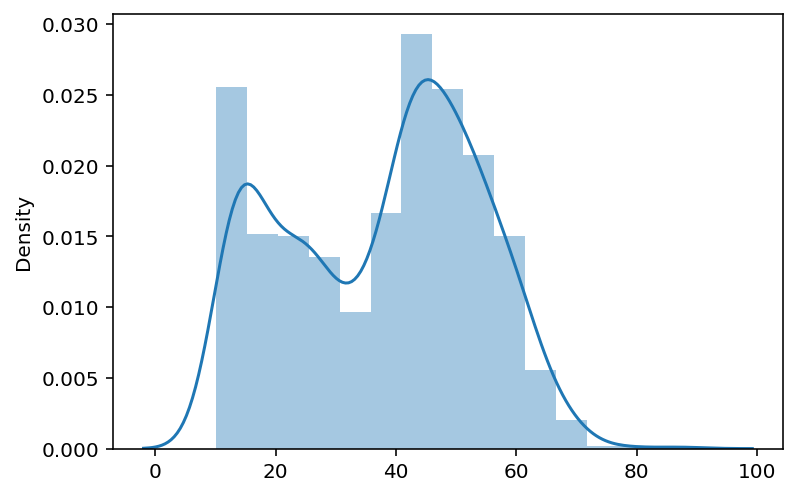

In [21]:
kScoreDF = pd.read_csv(IODataDir+'klout_Scores.csv', header=None, names=['K_score'])
sns.distplot(kScoreDF);

讓我們計算Klout得分樣本平均值的信賴區間範圍。 對於大樣本，我們可以用$\alpha = .05$的alpha水準並解決以下不等式。

$$\bar{x}-z_{\alpha/2}\cdot\frac{\sigma}{\sqrt{n}}\lt\hat{\mu}\lt\bar{x}+z_{\alpha/2}\cdot\frac{\sigma}{\sqrt{n}}$$ 

In [22]:
from scipy import stats
def calcuate_CI(kScoreDF, CI):
    sampleSize, sampleMean, sampleSD = kScoreDF.shape[0], kScoreDF['K_score'].mean(), kScoreDF['K_score'].std()
    # z_scores interval
    zscoreInterval = np.array(stats.norm.interval(CI))
    # standard error
    standardError = sampleSD/np.sqrt(sampleSize)
    meanInterval = sampleMean + (zscoreInterval*standardError)
    side_by_side('樣本數: '+str(sampleSize), '樣本平均值: '+ str(round(sampleMean, 3)),
                 '標準差: '+str(round(sampleSD, 3)))
    side_by_side("z_scores interval: " + str(zscoreInterval.round(3)),
                 "standard error: "+ str(round(standardError,3)))            
    print("lower and upper bound of Klout Mean Score: " + str(meanInterval.round(3)))

In [23]:
calcuate_CI(kScoreDF, 0.95)

'樣本數: 1048'    '樣本平均值: 37.719'    '標準差: 16.044'

'z_scores interval: [-1.96  1.96]'    'standard error: 0.496'

lower and upper bound of Klout Mean Score: [36.748 38.69 ]


#### using scipy.stats

In [24]:
stats.norm.interval(0.95, loc = kScoreDF['K_score'].mean(), 
                    scale=kScoreDF['K_score'].std()/np.sqrt(kScoreDF.shape[0]))

(36.74767601428062, 38.69043365079569)

在這個範例中，我們利用樣本數據在95%的信賴區間下，補獲了母體的平均值區間。這意味著我們有95％的把握確定Klout分數的實際母體平均值在36.75和38.69之間。如果我們詮釋成有95%的機率，母體平均數會落在在36.75和38.69之間是錯誤的，因為母體參數(平均數)不是隨機變數是個固定但未知的值，沒有機率的意義可言。我們只能說在95%的信賴區間下，補獲的母體的參數(平均值)區間可以描述樣本數據統計量的機率。倘若Klout這家公司說他們平均的Klout分數是40，你們覺得呢？
- 在我們只有95%的信心下，可能是我們蒐集的數據有誤呢？還是Klout說錯了呢？
- 樣本數據總數會影響信賴區間範圍的計算結果嗎？我們知道樣本數越小，$\sqrt{n},(n\gt{0})$就越小，信賴區間範圍就變寬。如下面的例子，減少樣本數或許計算出的信賴區間範圍可以捕獲了平均值參數，但那是因為信賴區間範圍也變大了，你們覺得統計推論需不需要嚴謹呢？

'樣本數: 50'    '樣本平均值: 37.536'    '標準差: 15.965'

'z_scores interval: [-1.96  1.96]'    'standard error: 2.258'

lower and upper bound of Klout Mean Score: [33.111 41.961]


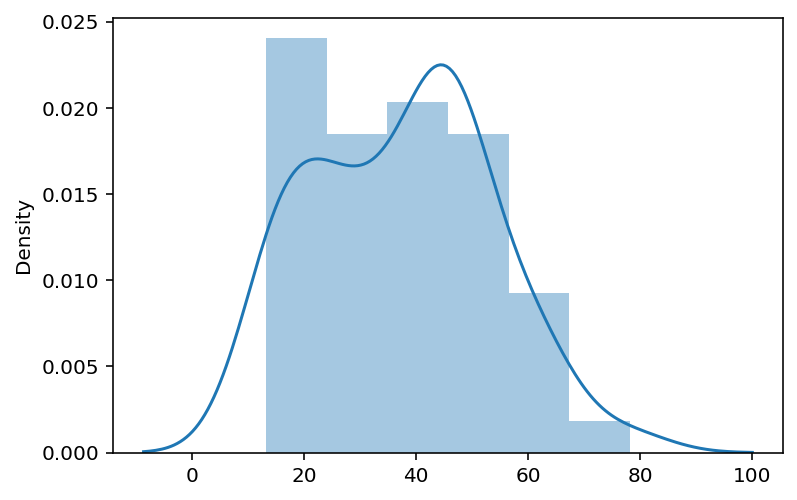

In [25]:
kScore50DF = kScoreDF.sample(50, random_state=1) ## or random_state=None
sns.distplot(kScore50DF);
calcuate_CI(kScore50DF, 0.95)

In [26]:
stats.norm.interval(0.95, loc = kScore50DF['K_score'].mean(), 
                    scale=kScore50DF['K_score'].std()/np.sqrt(kScore50DF.shape[0]))

(33.11077923778967, 41.96092442181033)

[回本章目錄](#本章目錄)

### 統計假設檢定(Hypothesis Tests) - Z檢定(z-Test) 
- Z檢定是一般用於大樣本(即樣本容量大於30)的平均值差異性檢驗的方法。Z檢定假設數據呈**常態分布**，但對於大數據，不總是那麼重要。當**母體標準差**是已知時，驗證一組樣本的平均值是否與某一期望值相等時，用Z檢定。檢定時又因目的的不同，而進行雙尾檢定(two-tailed testing)或單尾檢定(one-tailed testing)二種方式。雙尾檢定一般用於證明樣本的平均值與某一期望值相等與否。而單尾檢定則用於檢定樣本平均值大於或小於期望值時。Z檢定值計算的公式如下:(比較信賴區間的z值)
$$\mid z\mid =\mid\bar{x}-\mu_0\mid\cdot\frac{\sqrt{n}}{\sigma}$$


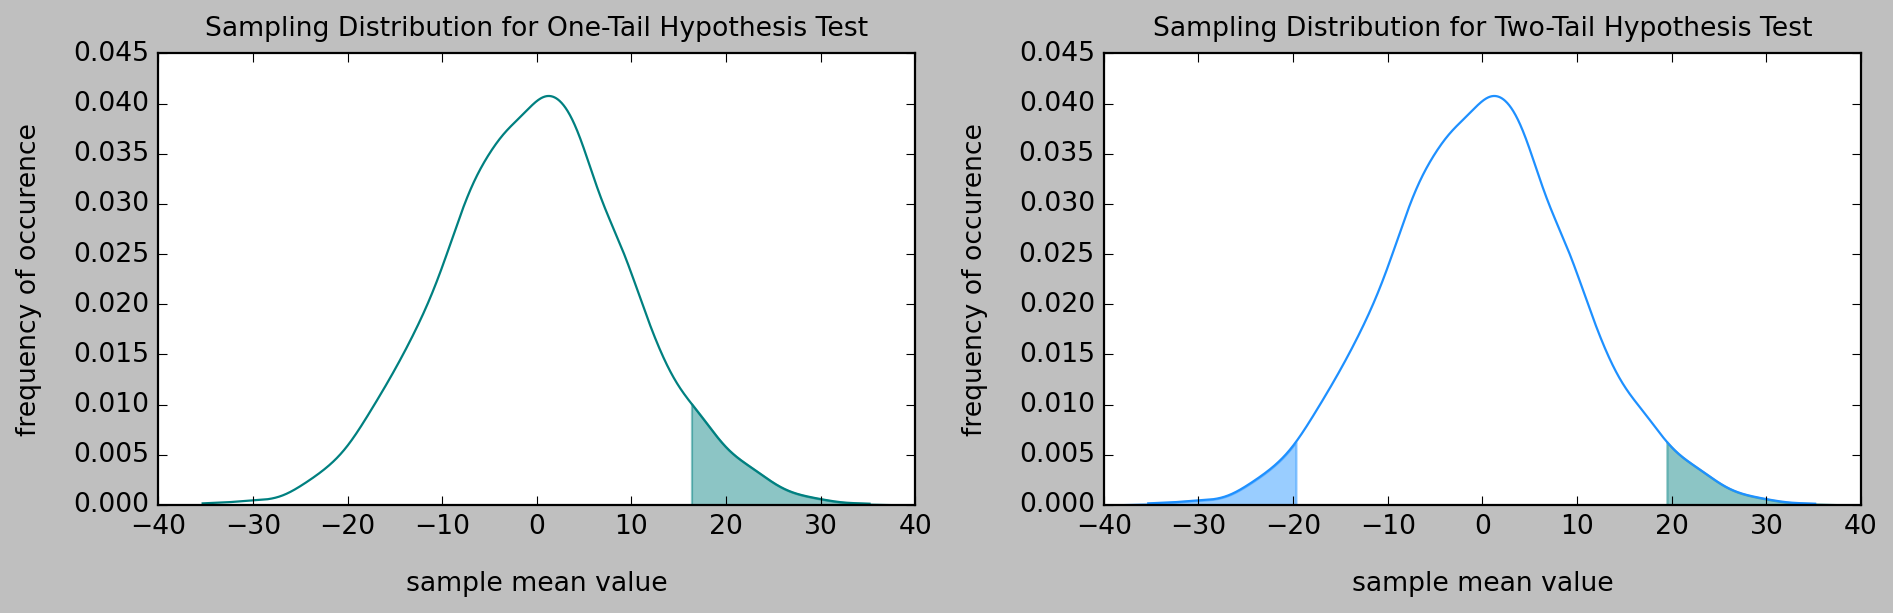

In [27]:
mpl.style.use('classic')
samples = np.random.normal(loc=0, scale=10, size=5000) # Zero mean, std =10
twoStds = np.mean(samples) + np.std(samples)*1.645 # 1.645 for 95% CI, one-tailed
alphaPositive = np.mean(samples) + np.std(samples)*1.96 # 1.96 for 95% CI
alphaNegative = np.mean(samples) - np.std(samples)*1.96 # 1.96 for 95% CI
kde = stats.gaussian_kde(samples)
pos = np.linspace(np.min(samples), np.max(samples), 2000)
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12,4))
ax1.plot(pos, kde(pos), color='teal')
shade = np.linspace(twoStds, 40, 300)
ax1.fill_between(shade, kde(shade), alpha=0.45, color='teal')
ax1.set_title("Sampling Distribution for One-Tail Hypothesis Test", y=1.015, fontsize=12)
ax1.set_xlabel("sample mean value", labelpad=14)
ax1.set_ylabel("frequency of occurence", labelpad=14)
ax2.plot(pos, kde(pos), color='dodgerblue')
shade = np.linspace(alphaPositive, 40, 300)
ax2.fill_between(shade, kde(shade), alpha=0.45, color='teal')
shade2 = np.linspace(alphaNegative, -40, 300)
ax2.fill_between(shade2, kde(shade2), alpha=0.45, color='dodgerblue')
ax2.set_title("Sampling Distribution for Two-Tail Hypothesis Test", y=1.015, fontsize=12)
ax2.set_xlabel("sample mean value", labelpad=14)
ax2.set_ylabel("frequency of occurence", labelpad=14)
fig.tight_layout()
plt.show()

In [28]:
# from statsmodels.stats import weightstats as tests
from statsmodels.stats.api import ztest
ztest_value ,p_value = ztest(kScoreDF['K_score'], x2=None, value=40)
side_by_side('z-test on '+str(kScoreDF.shape[0])+' samples: ', 
             'z-score: '+str(round(ztest_value, 3)), 'p-value: '+str(round(p_value,3)))
ztest_value ,p_value = ztest(kScore50DF['K_score'], x2=None, value=40)
side_by_side('z-test on '+str(kScore50DF.shape[0])+' samples: ', 
             'z-score: '+str(round(ztest_value, 3)), 'p-value: '+str(round(p_value,3)))

'z-test on 1048 samples: '    'z-score: -4.602'    'p-value: 0.0'

'z-test on 50 samples: '    'z-score: -1.091'    'p-value: 0.275'



誠如Klout這家公司說他們平均的Klout分數是40，你們同意嗎?我們使用上述的Z檢定來檢定真實性，我們的零假設($H_o$)是 $\mu$ = 40及替代假設($H_a$)是$\mu \ne$ 40。因為p-value(=0.0)小於0.05，我們拒絕了零假設($H_o$): $\mu$ = 40。但是如果我們採樣了50個樣本，我們得到的p-value(=0.275)是大於0.05，我們將不能拒絕零假設($H_o$): $\mu$ = 40。在我們討論P-Value對我們說明了那些有關統計數據訊息之前，讓我們對Z檢定與t檢定差別稍做討論。在Z檢定中，我們假設母體標準差是已知，而其實是以樣本標準差取代了母體標準差。在這種情況下，我們應使用t檢定(t-Test)進行對期望值(平均數)之檢測。在數據科學的應用上，我們更有興趣在對兩個變數間關係上的假設檢定，而不是對單一變數統計量假設檢定而已，這種情況下，我們應使用t檢定，t檢定亦可進行雙尾及單尾檢定。

In [29]:
from scipy.stats import ttest_1samp
# alternative= two-sided
print(np.round(ttest_1samp(kScoreDF['K_score'], 40), 3))

[-4.602  0.   ]


[回本章目錄](#本章目錄)

### P-Value對我們說明了那些有關統計數據的訊息?
在統計中執行假設檢定(hypothesis test)時，p-value可幫助我們確定在假設檢定上的統計意義。假設檢定是用於驗證我們對母體上的某個宣稱或假設。我們將要驗證的宣稱或假設稱為零(原)假設(null hypothesis)。<font color='red'>**如果零假設被檢定是不正確的，則隱含著我們或許可以(would but not will)相信(belief)那相對的替代假設(alternative hypothesis)**</font>。驗證中的證據就是我們手上有的數據以及伴隨數據的統計量(statistics)。這一統計量就是p-value，p-value是藉於0和1，解釋如下：
- 較小的統計量p-value(通常≤0.05)表示數據具有反對null hypothesis的統計意義，因此您拒絕原假設。
- 較大的統計量p-value(> 0.05)表示數據在針對null hypothesis的統計意義上並不充分，因此您無法拒絕原假設。
- 統計量p-value極接近0.05臨界值(cutoff)被認為是可以任意選擇，就任由讀者去決定吧。

舉個例子來說,假設一個披薩店聲稱其平均交貨時間為30分鐘或更短，但我們認為比這還多。讓我們來進行假設檢定:
- 我們宣稱一個零假設Ho表示平均交付時間最長為30分鐘(也就是說，我們期望拒絕這個假設，也就是說拒絕披薩店的聲稱)。
- 我們的替代假設(Ha)是平均時間大於30分鐘。

我們開始隨機抽樣一些交貨的時間並進行假設檢定求出統計量p-value，假設我們計算出的p-value是0.001，遠小於0.05，代表信賴區間範圍將不包含假設的平均值。通常在這種統計量的情況下(p-value小於0.05時)，我們願意拒絕原假設。因此，我們得出的結論是披薩店的聲稱是錯誤的。當然，我們可能抽樣了異常多的晚交貨時間數據或是數量與有效的數量都可能造成我們的推論是錯誤的，這也意味著依賴p-value來解讀統計上的顯著意義(statistically significant)是不足的，更不能過度解讀。
我們以下面的圖示來表達上述的概念
<img src="./Data_and_Images/Statistical_Modeling/p-value.jpg" width="400"/>

### 正確解讀P-Value: [The American Statistical Association's Statement](https://amstat.tandfonline.com/doi/pdf/10.1080/00031305.2016.1154108)
**使用P值的六項原則(six principles on how to use P values)**
1. P-value可以指出數據與假設的不相容程度(incompatible)。
2. P-value並不能衡量所研究的假設為真的概率，也不能衡量隨機產生數據本身的概率。
3. 科學的結論以及商業或政策的決策，不應僅基於P-value是否超過特定閾值。
4. 正確的推論需要完整的報告和透明度。
5. P-value或統計上的顯著意義(statistically significant)並不代表結果的強弱大小或是結果的重要性。
6. 就P-value本身而言，P-value無法指出我們蒐集的數據(證據)是好的(good measure)。

研究人員需要對**假設的合理性**，**類似研究的結果**，**擬議的機制**，**適當的實驗設計**等進行科學判斷。運用專業知識將統計量從數字轉換為有意義的且值得信賴的發現。

### P-Value於數據科學上的應用
假設我們有一組自變數(independent variables)與相對應的一個應變數(dependent variable)的數據, 我們想利用線性回歸作為我們的預測模式。我們的零(原)假設(null hypothesis)為:
- 假設我們的線性回歸模式無法解釋因果關係。對每一個自變數如果P-Value很小，則可以推斷出該自變數和應變數之間存在關聯。這意味著我們拒絕零假設，即可斷言兩個變量之間存在關聯。(事實上, 拒絕零假設並不代表關聯的強弱大小, 這是個危險的結論與運用, 學術界仍然大量使用而無視其他學者的警告!)
- 在線性回歸回分析的應用上, 我們較常使用R-squared來檢驗線性關係。詳細可以參考[回歸分析](./Lecture_5_Regression%20Analysis.ipynb#使用Scikit-Learn提供的線性回歸模組)。
- 實務上, 在機器學習領域裡, 我們面對的是多變量的樣本, 對每一個或兩個以上的特徵變數而言, 在不假設每個特徵變量的機率分布函數下, 我們在乎的是整體特徵變量所相關於分類或群聚的問題, 也就是我們的機器學習模型的正確率與可靠性，但是P-value在以後幾個章節還是會再應用到。

### 練習題: 雙尾檢定(two-tailed testing)或單尾檢定(one-tailed testing)
- 請列出下列**two-sided**, **smaller**, **larger**的個別零假設($H_o$)及替代假設($H_a$)
- Hint:

**Null Hypothesis:** $\mu$ = 40 
<br>**Alternative Hypthosis**: $\mu$ > 40 (larger)
<br>**Alternative Hypthosis**: $\mu$ < 40 (smaller)

In [30]:
side_by_side(np.round(ztest(kScoreDF['K_score'], x2=None, value=40, alternative='two-sided'), 3),
             np.round(ztest(kScoreDF['K_score'], x2=None, value=40, alternative='smaller'), 3),
             np.round(ztest(kScoreDF['K_score'], x2=None, value=40, alternative='larger'), 3))

array([-4.602,  0.   ])    array([-4.602,  0.   ])    array([-4.602,  1.   ])



[回本章目錄](#本章目錄)

### 4.5 樣本數據組間相關性與獨立性假設檢定的回顧與應用
在數據科學的應用上，我們更有興趣在對兩個變數間關係上的假設檢定，而不是對單一變數統計量假設檢定而已。我們來回顧獨立性的假設檢定:

### t檢定(t-test)應用於A/B Testing行銷應用範例
- 如同z檢定一樣，t檢定是用於檢驗假設的計算，但是當我們需要確定兩個獨立樣本數據組之間是否存在統計學上的顯著差異時，可以使用t檢定。換句話說，t檢定是在檢定兩組平均數之間是否不太可能出現差異。通常，在處理樣本量有限(n <30)的問題時，t檢定最合適。
- z檢定和t檢定均要求樣本數據具有常態分佈。

在單樣本(變量)t檢定是確定樣本平均值是否與已知或假設的母體均平均值(參數)在統計上不同。t檢定用在比較兩個獨立變數的平均值時，以確定是否有統計證據表明它們相關母體的平均值有顯著的不同，所以也稱為獨立性t檢定。在數據科學的應用上，獨立性t檢定對於分類變量間的獨立性可以應用於特徵變量的選擇。我們在本節的A/B Testing的行銷應用範例就是比較兩個獨立變數平均值的一種應用。我們使用的python模塊是:
- **tValue, pValue = stats.ttest_ind(aArray, bArray, equal_var=True)**
- A/B測試在行銷應用上，可以用來比較不同版本的行銷方式並衡量效果的差異。假設一家鞋類公司銷售兩種型號，Type101和Type102。為了提高銷售量，進行了積極性的廣告行銷活動。公司提供了活動之前，活動期間和活動之後的銷售數據。我們如何確定廣告行銷活動是成功的？ 

#### 敘述性統計

In [31]:
beforeDF = pd.read_excel(IODataDir+"before_sales.xlsx")
duringDF = pd.read_excel(IODataDir+"during_sales.xlsx")
afterDF = pd.read_excel(IODataDir+"after_sales.xlsx")
print('Data\n')
side_by_side(beforeDF.sample(3), duringDF.sample(3), afterDF.sample(3))
print('Descriptive Statistics\n')
side_by_side(beforeDF.describe(), duringDF.describe(), afterDF.describe())
print('Covariance\n')
side_by_side(beforeDF.cov(), duringDF.cov(), afterDF.cov())
print('Correlation Coefficient\n')
side_by_side(beforeDF.corr(), duringDF.corr(), afterDF.corr())
print('Standard Error\n')
side_by_side(beforeDF.sem(), duringDF.sem(), afterDF.sem())

Data

    Type101  Type102        Type101  Type102        Type101  Type102
29       10       17    11        9       27    16       11       25
30        7       16    0        20       30    58       13        9
52        8       13    25        9       27    36       11       12

Descriptive Statistics

         Type101    Type102             Type101    Type102             Type101   Type102
count  60.000000  60.000000    count  60.000000  60.000000    count  60.000000  60.00000
mean    7.933333  11.966667    mean   15.683333  21.100000    mean   10.683333  14.75000
std     2.455479   3.914193    std     5.133775   7.500734    std     2.619947   6.11091
min     4.000000   6.000000    min     8.000000   8.000000    min     6.000000   6.00000
25%     6.000000   8.750000    25%    11.750000  15.000000    25%     8.000000   9.75000
50%     8.000000  12.000000    50%    16.000000  22.500000    50%    11.000000  15.00000
75%    10.000000  16.000000    75%    20.000000  27.000000    75%    1

#### 兩個產品的相關性的程度

In [32]:
chinese()

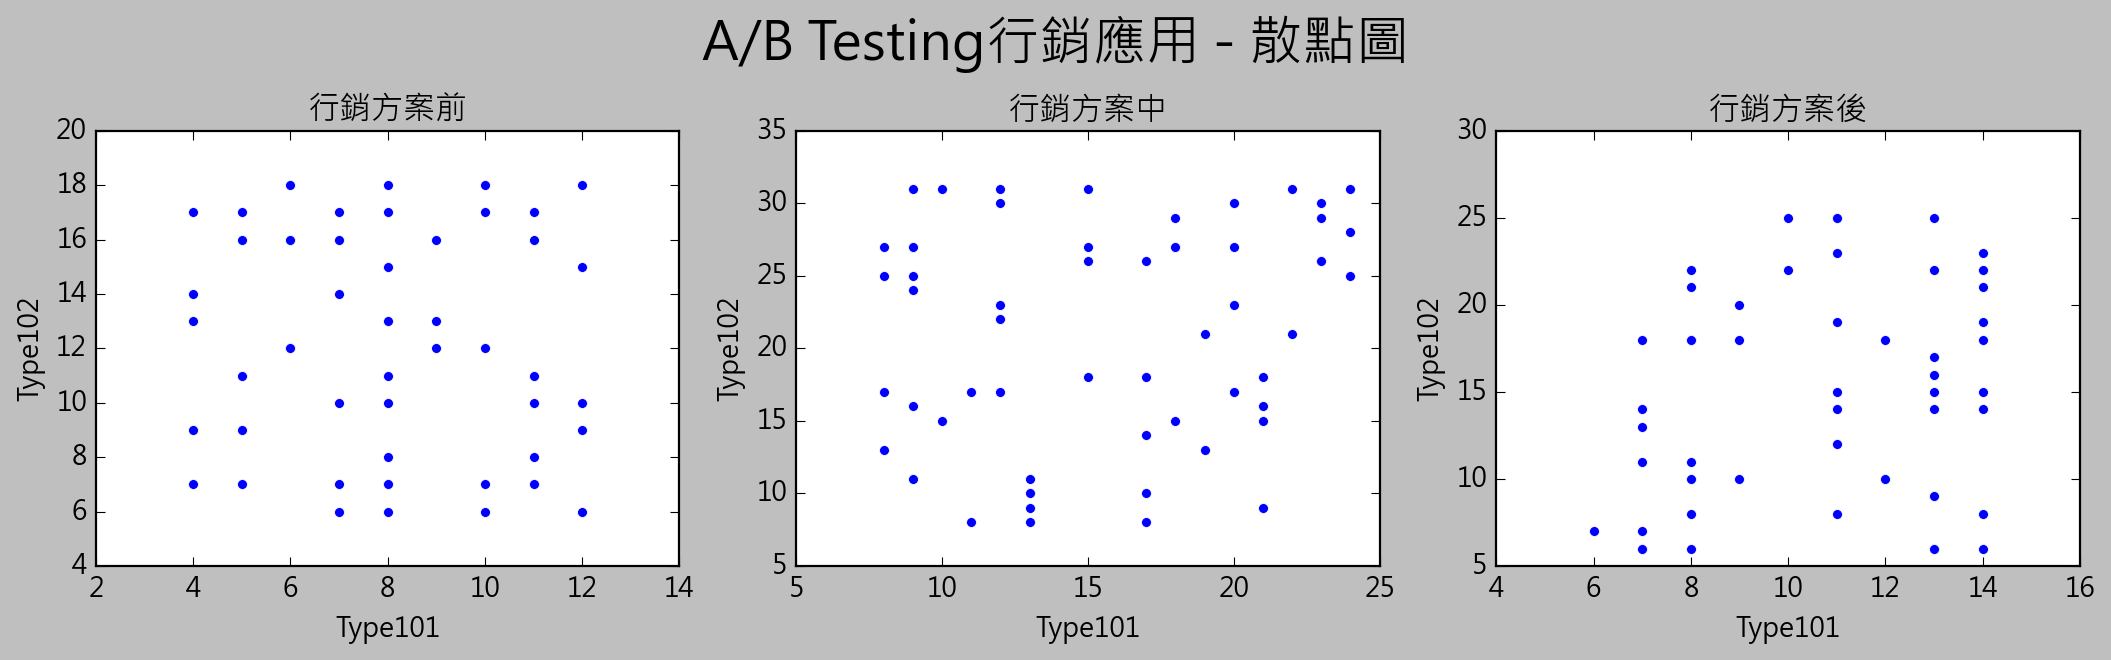

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle("A/B Testing行銷應用 - 散點圖", fontsize=24)
fig.subplots_adjust(top=0.8) 
fig.subplots_adjust(bottom=0.12)
sns.scatterplot("Type101", "Type102", data=beforeDF, ax=ax[0])
ax[0].set_title("行銷方案前")
sns.scatterplot("Type101", "Type102", data=duringDF, ax=ax[1])
ax[1].set_title("行銷方案中")
sns.scatterplot("Type101", "Type102", data=afterDF, ax=ax[2])
ax[2].set_title("行銷方案後")
# plt.tight_layout()
plt.show()

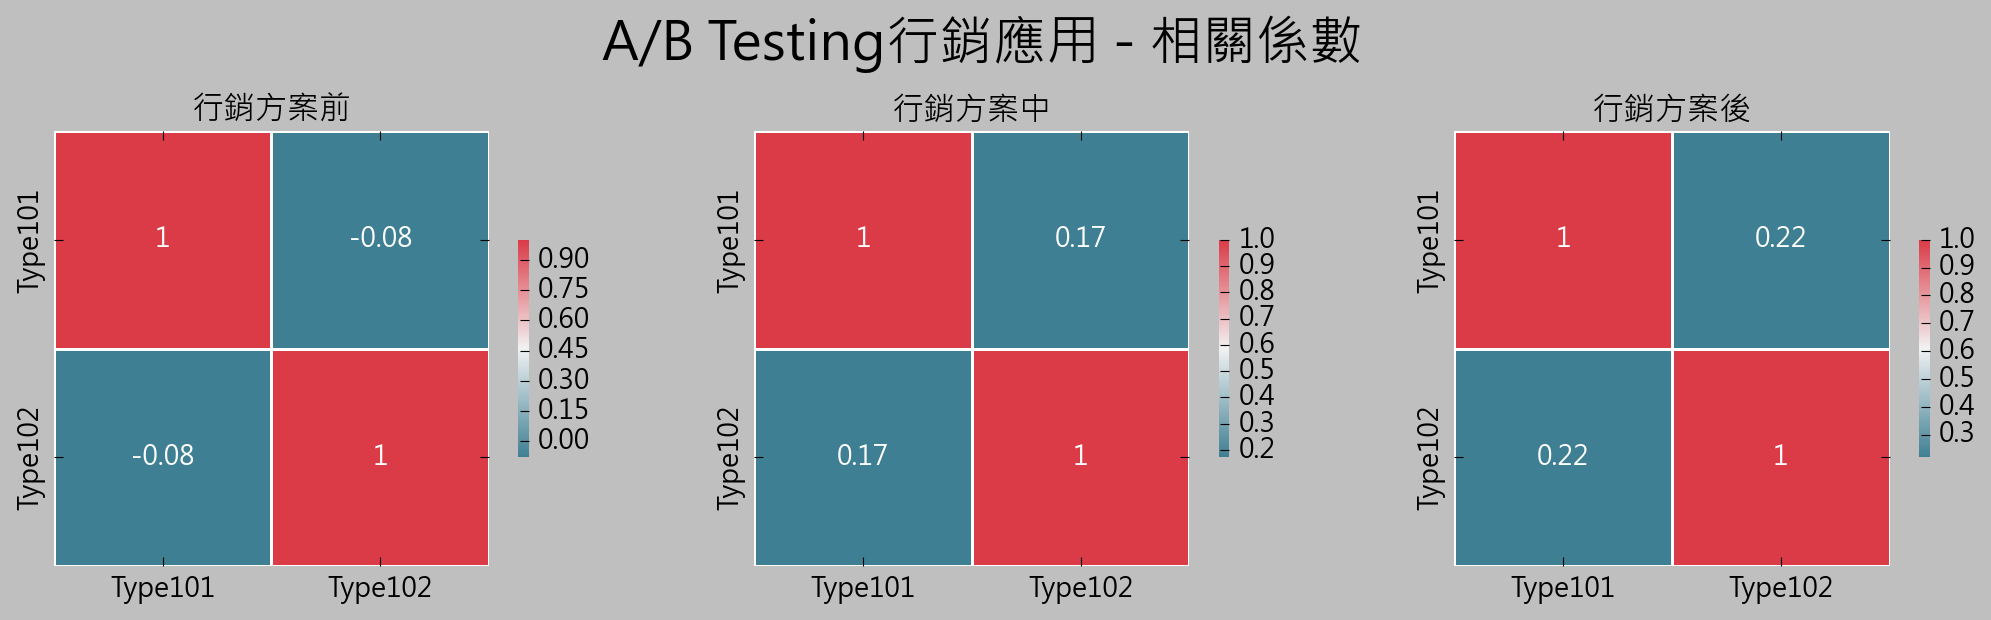

In [34]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle("A/B Testing行銷應用 - 相關係數", fontsize=24)
fig.subplots_adjust(top=0.8) 
fig.subplots_adjust(bottom=0.12)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(beforeDF.corr(), annot=True, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[0])
sns.heatmap(duringDF.corr(), annot=True, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[1])
sns.heatmap(afterDF.corr(), annot=True, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[2])
ax[0].set_title("行銷方案前");
ax[1].set_title("行銷方案中");
ax[2].set_title("行銷方案後");
# plt.tight_layout()
plt.show()

#### 兩個產品的相關性的程度，由上圖中可以了解產品的相關性不高。因此，我們只選擇Type01產品來驗證。

In [35]:
meanDiff = np.mean(afterDF.Type101) - np.mean(beforeDF.Type101)
meanGrowth = (np.mean(afterDF.Type101) - np.mean(beforeDF.Type101))/np.mean(beforeDF.Type101)*100
print('廣告活動前後的平均銷售額差異為 %.2f' %meanDiff)
print('廣告活動前後的平均銷售額成長為 %.2f%%' %meanGrowth)

廣告活動前後的平均銷售額差異為 2.75
廣告活動前後的平均銷售額成長為 34.66%


#### 當我們找出廣告活動前後的平均銷售額之間的差異時，發現活動後的銷售額大於活動前的銷售額。但是，
- 這個差異是事實還是偶然的緣故? 我們可以使用t檢定來推論。
- 如果銷售額成長幅度為34.66%，企業是否會願意花費數百萬美元。
- 這廣告活動對公司有效益嗎？如果廣告活動的回報不能使公司收支平衡，那麼走這條路就沒有任何意義。
- 樣本量小，有方法擴大?

In [36]:
# Confidential Interval for afterDF
ci = stats.norm.interval(0.95, loc = afterDF.Type101.mean(),
                         scale=afterDF.Type101.std()/np.sqrt(len(afterDF.Type101)))
side_by_side(ci, np.mean(afterDF.Type101))

(10.02040735940283, 11.346259307263837)    10.683333333333334



**Null Hypothesis:** $\mu_1=\mu_2$
<br>**Alternative Hypthosis**: $\mu_1\ne\mu_2\$

In [37]:
# Null Hypothesis: 平均銷售額沒有顯著差異
# Perform t-test and determine the p-value.
tValue, pValue = stats.ttest_ind(beforeDF.Type101, afterDF.Type101, equal_var=True)
if pValue < 0.05:
    side_by_side("p value is "+str(np.round(pValue,3)), "Reject 'The sales difference is NOT significant.'")
else:
    side_by_side("p value is "+str(np.round(pValue,3)), "Can not reject 'The sales difference is NOT significant.'")

'p value is 0.0'    "Reject 'The sales difference is NOT significant.'"



In [38]:
# t-test是假設所使用的數據來自常態分布, 我們將samples擴大
newAfterArray =  afterDF.Type101.std()*np.random.randn(1000)+afterDF.Type101.mean()
ciNew = stats.norm.interval(0.95, loc = newAfterArray.mean(),
                            scale=newAfterArray.std()/np.sqrt(len(newAfterArray)))

side_by_side('Confidence Interval', ci, ciNew)
side_by_side(np.mean(afterDF.Type101), newAfterArray.mean())
tValue, pValue = stats.ttest_ind(beforeDF.Type101, newAfterArray, equal_var=True)
if pValue < 0.05:
    side_by_side("p value is "+str(np.round(pValue,3)), "Reject 'The sales difference is NOT significant.'")
else:
    side_by_side("p value is "+str(np.round(pValue,3)), "Can not reject 'The sales difference is NOT significant.'")

'Confidence Interval'    (10.02040735940283, 11.346259307263837)    (10.615508945480666, 10.93093459927806)

10.683333333333334    10.773221772379364

'p value is 0.0'    "Reject 'The sales difference is NOT significant.'"



[回本章目錄](#本章目錄)

### 兩個變數的方差分析(ANOVA; F檢定)
方差分析（F-TEST）：t檢定在處理兩個獨立變數時效果很好，但有時我們想同時比較兩個以上的群組。例如，在鳶尾花的例子裡, 對花瓣寬度變量而言我們有三種類別組, 方差分析是一種統計推斷測試，可讓我們同時比較多個類別組，這個檢定稱為One Way F-test(Anova)，F的計算如下:$$F=\dfrac{\text{between group variance}}{\text{within group variance}}$$
Two Way F-test是One Way F-test的擴展，當我們同時考慮花瓣長度及寬度的2個變量時, 加上2個以上的鳶尾花類別組時，這種檢定即是Two Way F-test。注意Two Way F-test是無法確定哪個變量是主要變量。我們以iris數據為例:

### One Way F-Test on Iris Data Sets

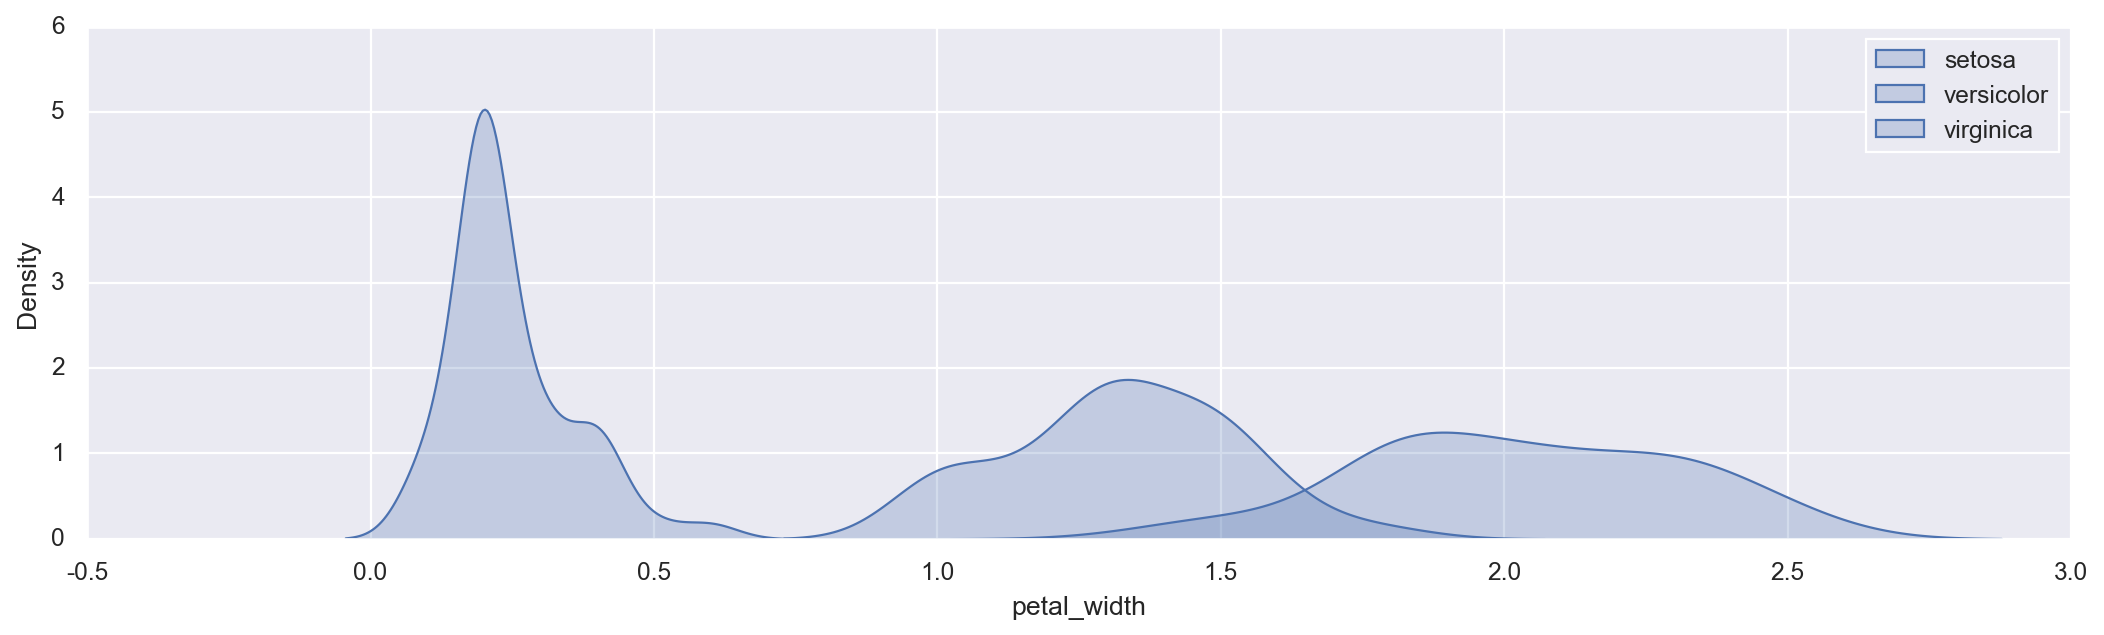

In [39]:
sns.set()
irisDF = sns.load_dataset('iris')
irisDF0 = irisDF.copy()
irisDF.set_index(keys=['species'], inplace=True)
setosaPL = irisDF.loc['setosa']['petal_width']
versicolorPL = irisDF.loc['versicolor']['petal_width']
virginicaPL = irisDF.loc['virginica']['petal_width']
# Construct kernel density estimate plot
fig = plt.figure(figsize=(16, 4))
sns.kdeplot(setosaPL, label='setosa', shade=True)
sns.kdeplot(versicolorPL, label='versicolor', shade=True)
sns.kdeplot(virginicaPL, label='virginica', shade=True)
plt.legend()
plt.show()

**Null Hypothesis:** $\mu_1=\mu_2=\mu_3$
<br>**Alternative Hypthosis**: $\mu_1\ne\mu_2\ne\mu_3$

### 常態分布的shapiro檢定
在我們進行F檢定之前，要確保數據滿足常態分布，因為該檢定對非常態分布數據高度敏感。 

In [40]:
for name in irisDF0['species'].unique():
    statistics, pValue = stats.shapiro(irisDF0['sepal_width'][irisDF0['species'] == name])
    if pValue < 0.05:
        side_by_side(name, statistics, pValue, "p value is "+str(np.round(pValue,3)), 
                     "拒絕是常態分布的假設")
    else:
        side_by_side(name, statistics, pValue, "p value is "+str(np.round(pValue,3)), 
                     "無法拒絕是常態分布的假設")

'setosa'    0.97171950340271    0.2715264856815338    'p value is 0.272'    '無法拒絕是常態分布的假設'

'versicolor'    0.9741330742835999    0.33798879384994507    'p value is 0.338'    '無法拒絕是常態分布的假設'

'virginica'    0.9673910140991211    0.1809043288230896    'p value is 0.181'    '無法拒絕是常態分布的假設'



In [41]:
side_by_side(irisDF0['petal_width'].mean(), irisDF0.groupby('species')['petal_width'].mean())

1.199333333333334    species                          
                     setosa        0.246              
                     versicolor    1.326              
                     virginica     2.026              
                     Name: petal_width, dtype: float64



In [42]:
from scipy import stats
FValue, pValue = stats.f_oneway(setosaPL, versicolorPL, virginicaPL)
side_by_side(FValue, pValue)
if pValue < 0.05:
    side_by_side("p value is "+str(np.round(pValue,3)), "Reject those means are equal.")
else:
    side_by_side("p value is "+str(np.round(pValue,3)), "Can not Reject those means are equal.")

960.007146801809    4.169445839443116e-85

'p value is 0.0'    'Reject those means are equal.'



### Two Ways F-Test

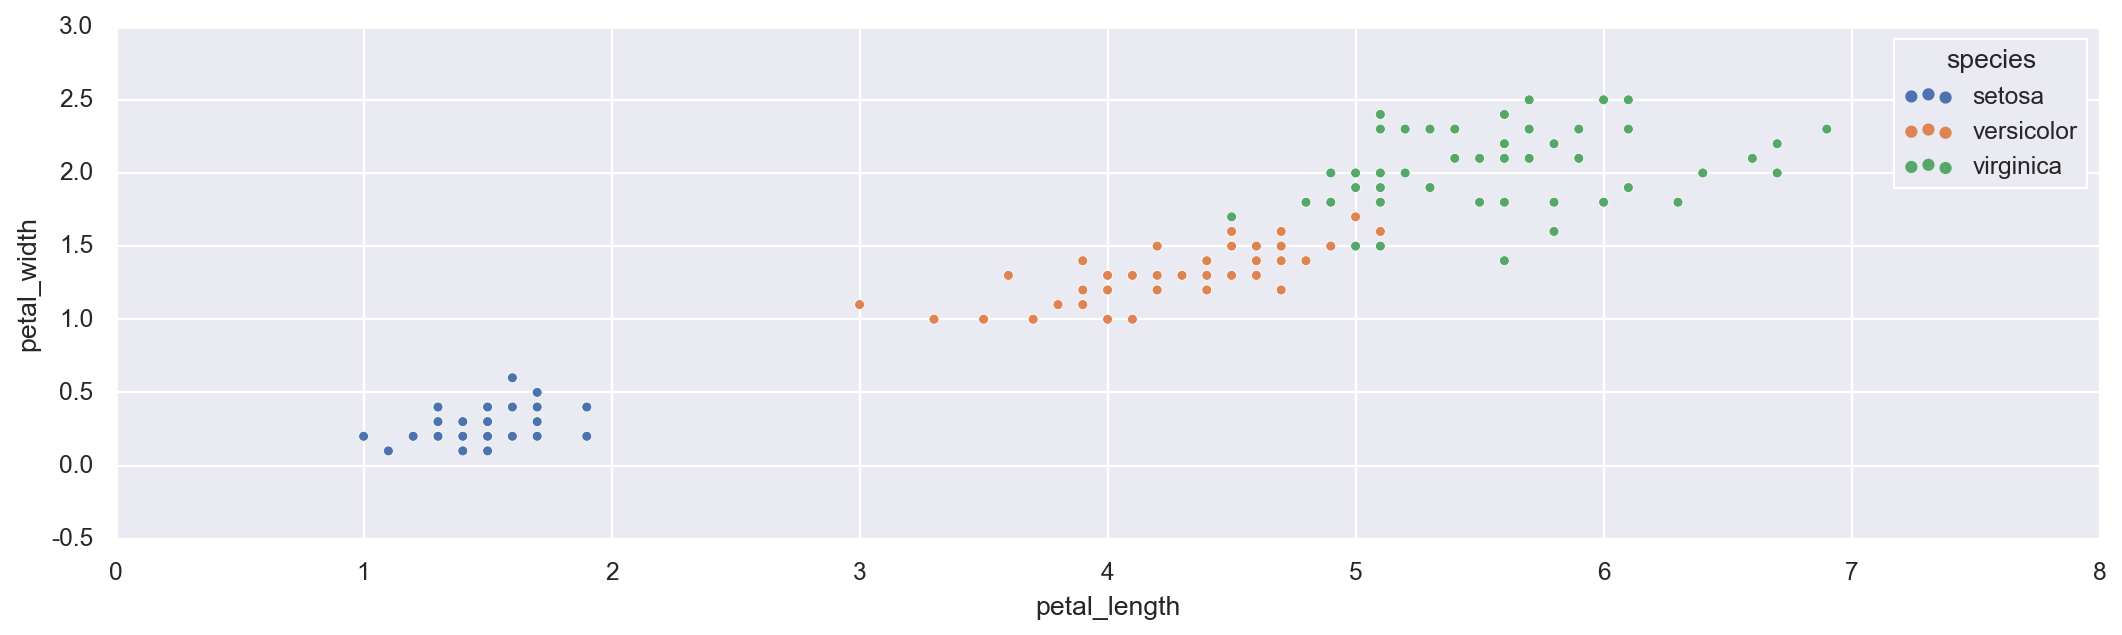

In [43]:
setosaPL = irisDF.loc['setosa'][['petal_length', 'petal_width']]
versicolorPL = irisDF.loc['versicolor'][['petal_length', 'petal_width']]
virginicaPL = irisDF.loc['virginica'][['petal_length', 'petal_width']]
# Construct kernel density estimate plot
fig = plt.figure(figsize=(16, 4))
sns.scatterplot(x='petal_length', y= 'petal_width', hue='species', data=irisDF0)
plt.show()

In [44]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Ordinary Least Squares (OLS) model
model = ols('petal_width:petal_length ~ C(species)', data=irisDF0).fit()
print(sm.stats.anova_lm(model, typ=2))
print("F統計的概率具有統計學意義'(PR(>F)<0.05)'意味著petal_width以及petal_lengthspecies中的信息對specie具有預測能力。")
# model.summary()

                 sum_sq     df           F        PR(>F)
C(species)  2987.357417    2.0  683.108573  3.759084e-75
Residual     321.428802  147.0         NaN           NaN
F統計的概率具有統計學意義'(PR(>F)<0.05)'意味著petal_width以及petal_lengthspecies中的信息對specie具有預測能力。


[回本章目錄](#本章目錄)

### 皮爾森的卡方檢定(Pearson’s Chi-Squared Test)
- z檢定(z-Test)以及t檢定都是在常態分佈下的假設，而卡方檢定($\chi^2$)則假設卡方分佈的統計量。
- 卡方獨立性檢定是無母數統計檢定且用於檢驗兩個類別變量是否相關的過程。在機器學習分類(classification)的應用上，如果特徵變量與目標變量都是分類變量時，我們可以使用卡方獨立性檢定來檢定目標變量與某特徵變量間是否具有獨立性。如果是獨立的，則該特徵變量是可能與問題無關，我們可以從數據集中刪除該特徵變量。這也就是特徵選擇(feature selection)的應用。我們在[特徵的選擇與特徵的擷取](./Lecture_4_Feature_Selection_and_Extraction.ipynb#卡方獨立性檢定&#40;Chi-Square-&#40;$\chi^{2}$&#41;-Independence-Test&#41;)章節中會再舉例說明。
- Chi-Square($\chi^{2}$)統計量的計算如下:
$$\chi^2=\sum_{i=1}^{n}\frac{(O_i-E_i)^2}{E_i}$$
- 其中$O_i$是類別$i$中的觀測值，而$E_i$是類別$i$中的期望數，$E_i$由觀測值評估而來。
- 一旦計算出$\chi^{2}$統計量，$\chi^{2}$還必須評估自由度，然後就如Z-Score一樣查表找出p-value，$\chi^{2}$並與信賴區間的假設相比後，做出結論。卡方獨立性檢定的自由度計算為: 假設列聯表有r行(row)和c列(columns)(哈哈!翻譯!)，計算卡方檢定的自由度的一般規則是(r-1) ∗ (c-1)。
- Chi-Square($\chi^{2}$)的分布函數如下:

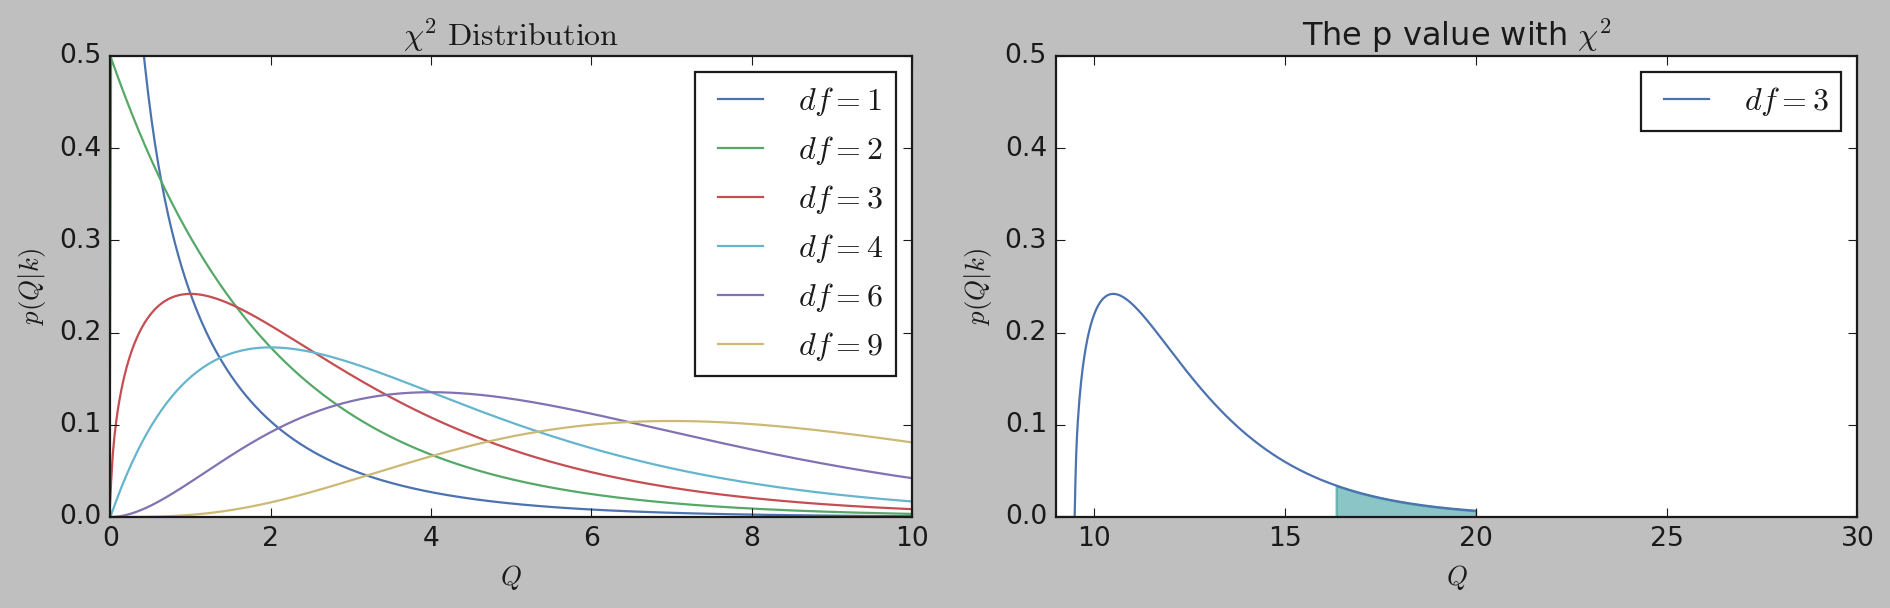

In [45]:
import matplotlib as mpl
mpl.style.use('classic')
from scipy.stats import chi2
chiValues = [1, 2, 3, 4, 6, 9]
mu = 0
x = np.linspace(-1, 20, 1000)

# plot the distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.subplots_adjust(bottom=0.12)
for df in chiValues:
    dist = chi2(df, mu)
    ax[0].plot(x, dist.pdf(x), label=r'$df=%i$' % df)

ax[0].set_xlim(0, 10)
ax[0].set_ylim(0, 0.5)
ax[0].set_xlabel('$Q$')
ax[0].set_ylabel(r'$p(Q|k)$')
ax[0].set_title(r'$\chi^2\ \mathrm{Distribution}$')
ax[0].legend()

dist = chi2(3, x.mean())
ax[1].plot(x, dist.pdf(x), label=r'$df=3$')
twoStd = x.mean() + x.std()*1.645
shade = np.linspace(twoStds, 20, 100)
ax[1].fill_between(shade, dist.pdf(shade), alpha=0.45, color='teal')
ax[1].legend()
ax[1].set_xlim(9, 30)
ax[1].set_ylim(0, 0.5)
ax[1].set_xlabel('$Q$')
ax[1].set_ylabel(r'$p(Q|k)$')
ax[1].set_title('The p value with '+r'$\chi^2$')
fig.tight_layout()
plt.show()

[回本章目錄](#本章目錄)

### 4.6 範例 - 自行車共享數據集的統計假設檢定

### 租用數的季節性分佈(Seasonal Distribution of Total Counts)
- 我們首先介紹pandas的melt函數，當我們需要多層級分拆資料時，透過melt功能就能省去繁雜的操作，以一條函數式達到目的。
- pandas.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index=True)
    - frame : 你想要更動的 DataFrame。
    - id_vars: 可使用tuple、list或ndarray，用以設定不想要被轉換的欄位。
    - value_vars: 可使用tuple、list或 ndarray，用以設定想要被拆解的欄位。 如果省略則拆解全部欄位。
    - var_name : 轉換後id的名稱。如果省略則設定為原本 DataFrame 的欄位名稱或是variable。
    - value_name : 轉換後value欄位的名稱。如果省略則顯示原本DataFrame 的欄位名稱或value。
    - col_level : 可使用int、string。如果columns是MultiIndex，則使用該參數來進行選擇。
- 我們將針對不同的小時與不同的工作日來分別計算註冊用戶以及休閒用戶的使用次數。
- 我們將使用seaborn.FacetGrid將數據集映射到相對應的行和列的網格中。

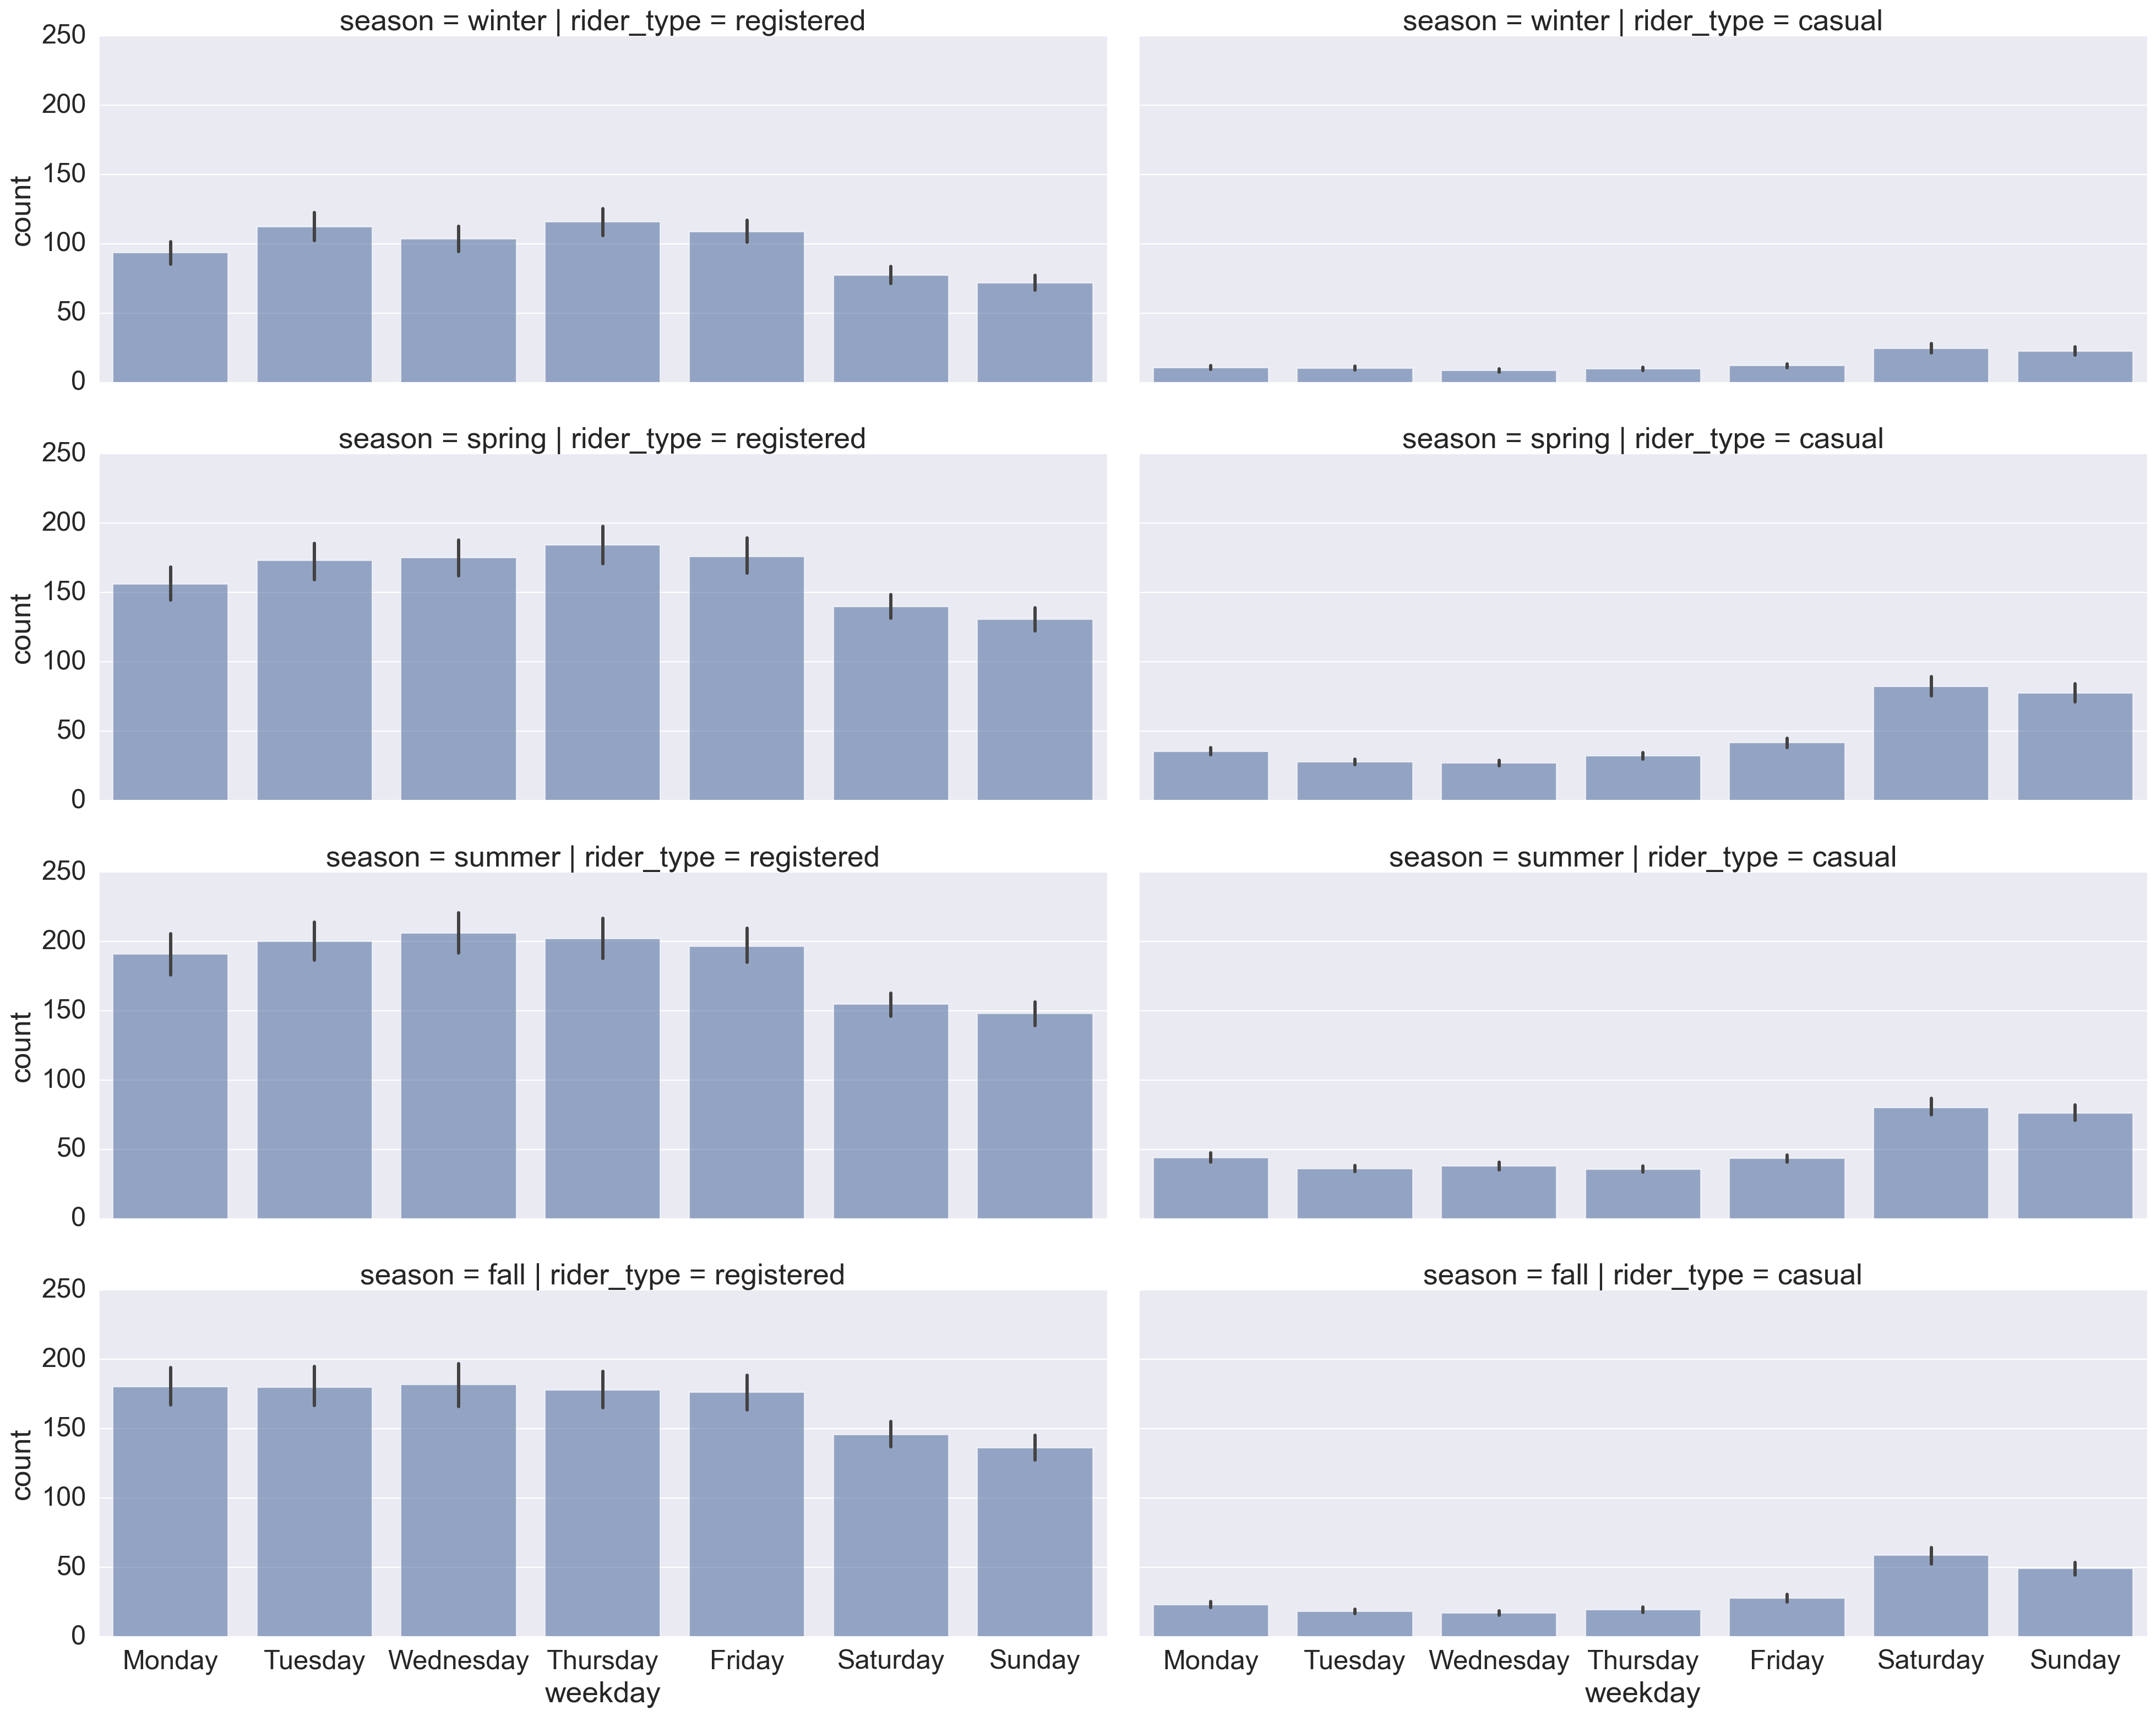

In [46]:
bikeHourDF = pd.read_csv(IODataDir+'bikeHourCleanDF.csv')
plot_data = bikeHourDF[['weekday', 'season', 'registered', 'casual']]
plot_data = plot_data.melt(id_vars=['weekday', 'season'], var_name='rider_type', value_name='count')
plot_data.season.replace({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}, inplace=True)
plot_data.weekday.replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                           4: 'Thursday', 5: 'Friday', 6: 'Saturday'}, inplace=True)
sns.set(font_scale=2)
grid = sns.FacetGrid(plot_data, row='season', col='rider_type', height=5, aspect=2.5, 
                     row_order=['winter', 'spring', 'summer', 'fall'])
# populate the FacetGrid with the specific plots
grid.map(sns.barplot, 'weekday', 'count', alpha=0.6, 
         order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# grid.savefig(IODataDir+'season_hour_distributions.png', format='png')
plt.show()

在上圖中出現了一個有趣的樣式。週末註冊用戶的使用次數與一周中的其餘時間相比，是減少的，而休閒用戶的的使用次數卻相反，是增加的。 這可能會強化了我們的假設，即註冊用戶大多將自行車共享服務用於工作日，而休閒用戶則常在周末時使用該服務。當然，這樣的結論不能僅基於圖表的觀察，而必須得到統計檢驗的支持。
### 註冊用戶的使用次數檢定
我們首先定義零假設$H_o$及替代假設$H_a$:
- $H_o$:工作日註冊用戶使用次數的平均-週末註冊用戶使用次數的平均$=$ 0
- $H_a$:工作日註冊用戶使用次數的平均-週末註冊用戶使用次數的平均$\neq$ 0

In [47]:
bikeHourDF = pd.read_csv(IODataDir+'bikeHourCleanDF.csv')
plot_data = bikeHourDF[['weekday', 'season', 'registered', 'casual']]
plot_data.season.replace({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}, inplace=True)
plot_data.weekday.replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                           4: 'Thursday', 5: 'Friday', 6: 'Saturday'}, inplace=True)
weekend_days = ['Saturday', 'Sunday']
weekend_mask = plot_data.weekday.isin(weekend_days)
workingdays_mask = ~plot_data.weekday.isin(weekend_days)
weekend_data = plot_data.registered[weekend_mask]
workingdays_data = plot_data.registered[workingdays_mask]
side_by_side(weekend_data.sample(5), workingdays_data.sample(5))

11152    167                      15438    238                  
12480     15                      1997       3                  
8128      68                      1360      23                  
14012     92                      10252    105                  
15521    156                      3836     510                  
Name: registered, dtype: int64    Name: registered, dtype: int64



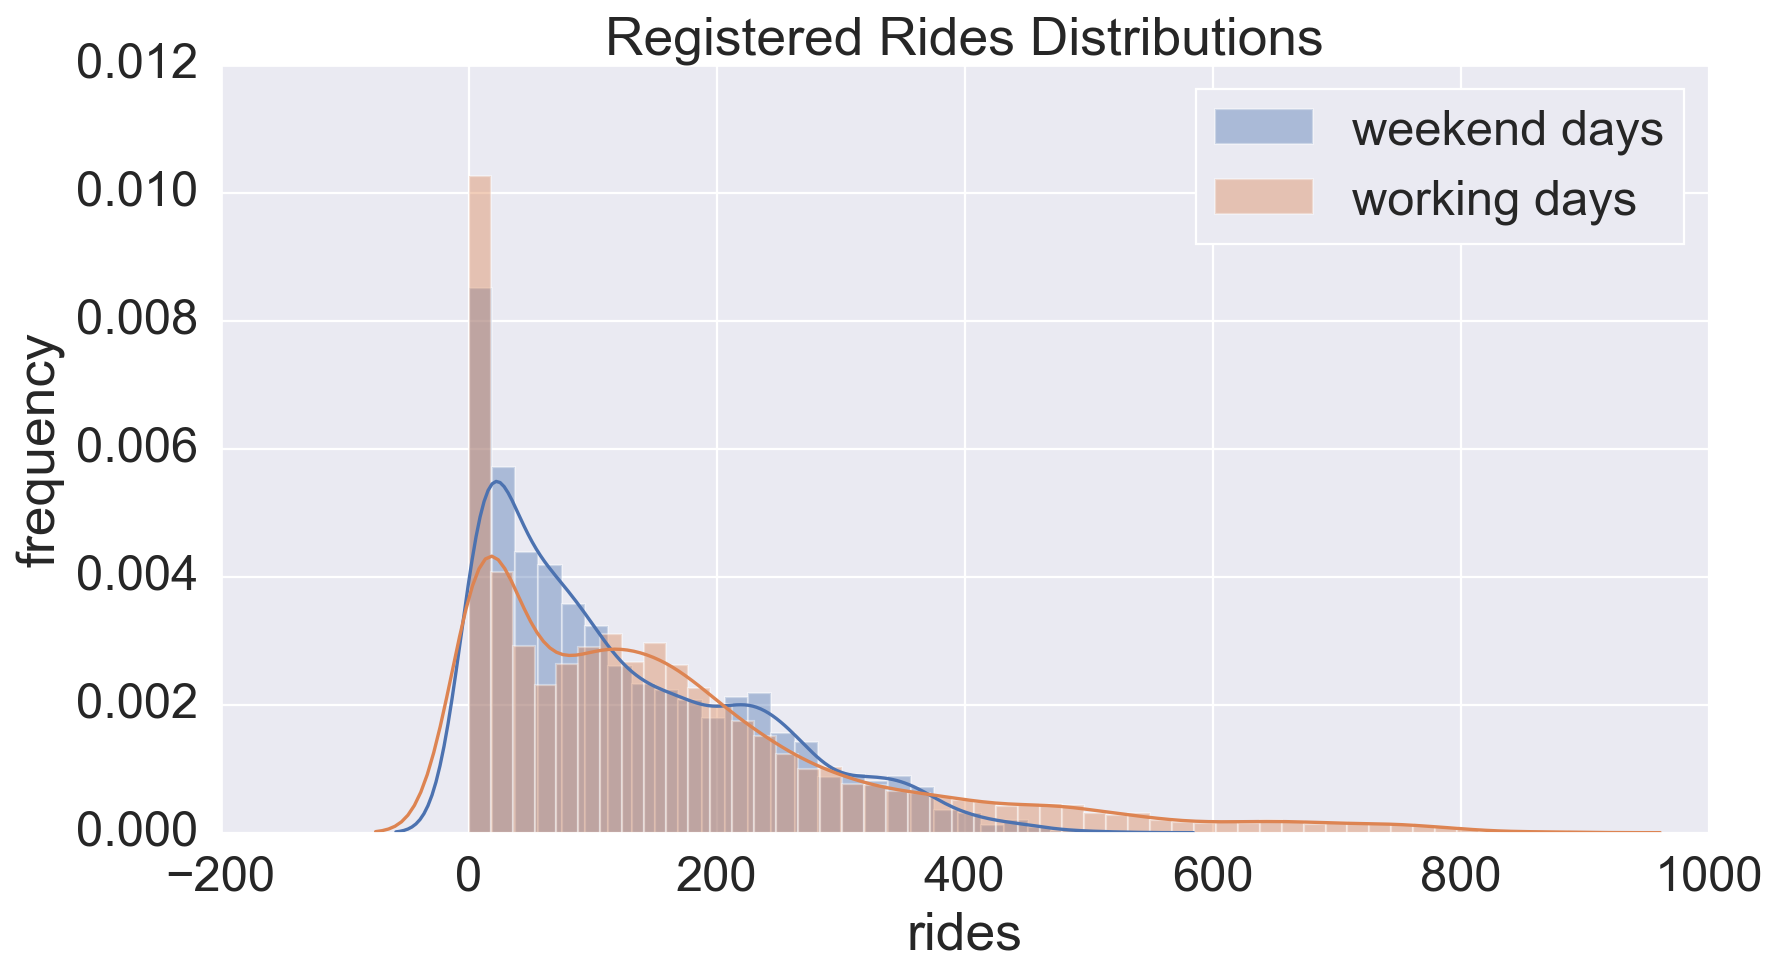

In [48]:
fig,ax = plt.subplots(figsize=(12,6))
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Registered Rides Distributions")
plt.show()

In [49]:
# Null Hypothesis: 工作日註冊用戶使用的平均次數與週末註冊用戶使用的平均次數沒有顯著差異
# Perform t-test and determine the p-value.
from scipy.stats import ttest_ind
tValue, pValue = stats.ttest_ind(weekend_data, workingdays_data, equal_var=True)
if pValue < 0.05:
    side_by_side("p value is "+str(np.round(pValue,3)), "拒絕 '平均次數沒有顯著差異' 的假設")
else:
    side_by_side("p value is "+str(np.round(pValue,3)), "不能拒絕'平均次數沒有顯著差異' 的假設")
    from scipy.stats import ttest_ind
print(f"Statistic value: {tValue:.03f}, p-value: {pValue:.03f}")

'p value is 0.0'    "拒絕 '平均次數沒有顯著差異' 的假設"

Statistic value: -16.004, p-value: 0.000


### 休閒用戶的使用次數檢定
我們首先定義零假設$H_o$及替代假設$H_a$:
- $H_o$:工作日休閒用戶使用次數的平均-週末休閒用戶使用次數的平均$=$ 0
- $H_a$:工作日休閒用戶使用次數的平均-週末休閒冊用戶使用次數的平均$\neq$ 0

In [50]:
bikeHourDF = pd.read_csv(IODataDir+'bikeHourCleanDF.csv')
plot_data = bikeHourDF[['weekday', 'season', 'registered', 'casual']]
plot_data.season.replace({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}, inplace=True)
plot_data.weekday.replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                           4: 'Thursday', 5: 'Friday', 6: 'Saturday'}, inplace=True)
weekend_days = ['Saturday', 'Sunday']
weekend_mask = plot_data.weekday.isin(weekend_days)
workingdays_mask = ~plot_data.weekday.isin(weekend_days)
weekend_data = plot_data.casual[weekend_mask]
workingdays_data = plot_data.casual[workingdays_mask]
side_by_side(weekend_data.sample(5), workingdays_data.sample(5))

8303      33                  3352      27              
4315     181                  12251     46              
11971     30                  2654      48              
14685     15                  8393      14              
13839    117                  11287    102              
Name: casual, dtype: int64    Name: casual, dtype: int64



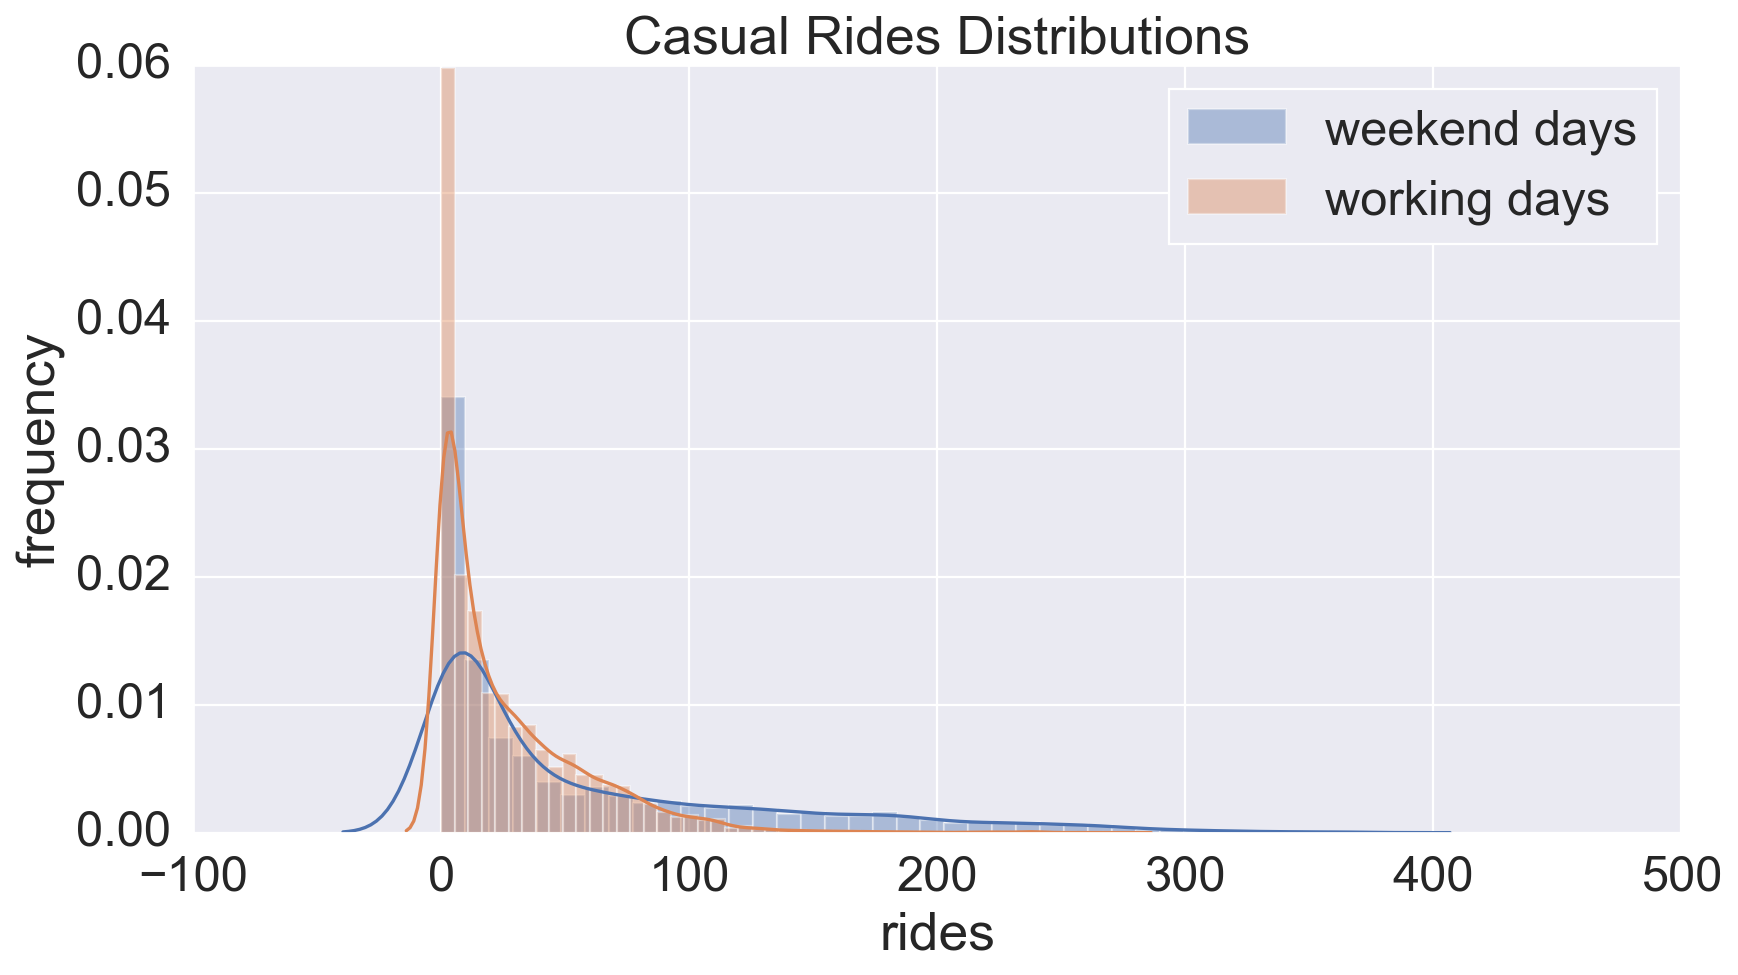

In [51]:
fig,ax = plt.subplots(figsize=(12,6))
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Casual Rides Distributions")
plt.show()

In [52]:
# Null Hypothesis: 工作日休閒用戶使用的平均次數與週末休閒用戶使用的平均次數沒有顯著差異
# Perform t-test and determine the p-value.
from scipy.stats import ttest_ind
tValue, pValue = stats.ttest_ind(weekend_data, workingdays_data, equal_var=True)
if pValue < 0.05:
    side_by_side("p value is "+str(np.round(pValue,3)), "拒絕 '平均次數沒有顯著差異' 的假設")
else:
    side_by_side("p value is "+str(np.round(pValue,3)), "不能拒絕'平均次數沒有顯著差異' 的假設")
    from scipy.stats import ttest_ind
print(f"Statistic value: {tValue:.03f}, p-value: {pValue:.03f}")

'p value is 0.0'    "拒絕 '平均次數沒有顯著差異' 的假設"

Statistic value: 41.077, p-value: 0.000


[回本章目錄](#本章目錄)